# **Diplomado de Machine Learning con Python**
## Tarea 07 – Sesión 14

## **Regresión Lineal y Regresión Regularizada**  

📈 En esta tarea se aborda la aplicación de modelos de regresión lineal como herramienta de predicción en flujos de machine learning, utilizando un conjunto de datos inmobiliarios multivariado proveniente de la región de Saratoga.

La regresión lineal permite modelar la relación entre variables independientes (características de las propiedades) y una variable objetivo (precio), ajustando un conjunto de coeficientes que cuantifican el impacto individual de cada variable. Además, se explorará el uso de técnicas de regularización para mejorar la estabilidad del modelo y evitar sobreajuste.

El objetivo final es comparar el desempeño de una regresión lineal clásica y una regresión regularizada óptima, tanto en términos de métricas como de interpretabilidad de los coeficientes.

1. **Regresión lineal clásica**
2. **Regresión regularizada óptima**

Esto permitirá evaluar el rendimiento y la interpretabilidad de distintos enfoques de regresión, aplicados a un problema real de predicción de precios inmobiliarios.

Para esta tarea se utilizará el **dataset Saratoga**. 


<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*eyQeqirqHTE6hat6HdhrjQ.png" alt="Texto alternativo" width="500"/>
</div>










# **Importación de librería y lectura de datos**



In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

In [311]:
# Load dataset from CSV file
# Cargar conjunto de datos desde archivo CS

df = pd.read_csv("Saratoga.csv")  # Ajusta la ruta según tu estructura
df


,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,price
0,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No,132500
1,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No,181115
2,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No,109000
3,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No,155000
4,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,86060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,0.53,39,34700,1624,61,3,0,1.0,4,hot air,gas,public/commercial,No,No,No,190000
1714,0.54,19,30200,1650,61,3,1,2.0,4,hot air,gas,public/commercial,No,No,Yes,317500
1715,1.34,34,36700,1313,61,2,0,1.5,3,electric,electric,septic,No,No,No,70000
1716,0.65,19,33500,2600,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No,300000


# **Análisis exploratorio de datos (EDA)**

## Revision general de los datos

In [312]:
# Resumen de los datos

d_type = df.dtypes # Tipo de dato
n_non_null = df.count() # Numero de valores no nulos
n_unique = df.nunique() # Numero de valores unicos
n_null = df.isnull().sum() # Numero de valors nulos
ratio_null = df.isnull().sum()/df.shape[0] # Porcentaje de valores nulos

pd.DataFrame(
    {"d_type": d_type,
     "n_non_null": n_non_null,
     "n_unique": n_unique,
     "n_null": n_null,
     "ratio_null": ratio_null}
)

,d_type,n_non_null,n_unique,n_null,ratio_null
lotSize,float64,1718,170,0,0.0
age,int64,1718,135,0,0.0
landValue,int64,1718,572,0,0.0
livingArea,int64,1718,872,0,0.0
pctCollege,int64,1718,32,0,0.0
bedrooms,int64,1718,7,0,0.0
fireplaces,int64,1718,5,0,0.0
bathrooms,float64,1718,9,0,0.0
rooms,int64,1718,11,0,0.0
heating,object,1718,3,0,0.0


## Estadísticas descriptivas

In [313]:
# ---- Para variables categóricas ----


# Convertir columnas a categorica
# df[] = df[].astype('category')

# Identificar columnas categóricas
categoricas = df.select_dtypes(include=["object", "category"]).columns

# Crear diccionario para almacenar las tablas
tablas_frecuencia = {}

print('Variables categóricas:\n')

# Iterar sobre cada variable categórica
for col in categoricas:
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True) * 100

    tabla = pd.DataFrame({
    "freq_abs": freq_abs,
    "freq_rel": freq_rel.round(2)
    }).reset_index()

    tablas_frecuencia[col] = tabla

    print(f"Variable: {col}")
    display(tabla)
    print("\n")

Variables categóricas:

Variable: heating


,heating,freq_abs,freq_rel
0,hot air,1115,64.90
1,electric,305,17.75
2,hot water/steam,298,17.35




Variable: fuel


,fuel,freq_abs,freq_rel
0,gas,1188,69.15
1,electric,315,18.34
2,oil,215,12.51




Variable: sewer


,sewer,freq_abs,freq_rel
0,public/commercial,1205,70.14
1,septic,501,29.16
2,none,12,0.70




Variable: waterfront


,waterfront,freq_abs,freq_rel
0,No,1703,99.13
1,Yes,15,0.87




Variable: newConstruction


,newConstruction,freq_abs,freq_rel
0,No,1638,95.34
1,Yes,80,4.66




Variable: centralAir


,centralAir,freq_abs,freq_rel
0,No,1084,63.1
1,Yes,634,36.9


In [314]:
# ---- Para variables numéricas ----

print('Variables numéricas:')
display(df.select_dtypes(include=["number"]).describe().round(2).T)


Variables numéricas:


,count,mean,std,min,25%,50%,75%,max
lotSize,1718.0,0.50,0.70,0.0,0.17,0.37,0.54,12.2
age,1718.0,27.87,29.23,0.0,13.00,19.00,33.75,225.0
landValue,1718.0,34598.44,35108.17,200.0,15100.00,25000.00,40200.00,412600.0
livingArea,1718.0,1753.45,619.73,616.0,1300.25,1632.00,2130.50,5228.0
pctCollege,1718.0,55.55,10.36,20.0,52.00,57.00,64.00,82.0
bedrooms,1718.0,3.15,0.82,1.0,3.00,3.00,4.00,7.0
fireplaces,1718.0,0.60,0.56,0.0,0.00,1.00,1.00,4.0
bathrooms,1718.0,1.90,0.66,0.0,1.50,2.00,2.50,4.5
rooms,1718.0,7.04,2.31,2.0,5.00,7.00,8.00,12.0
price,1718.0,211763.06,98439.79,5000.0,145000.00,189900.00,257000.00,775000.0


## Visualización exploratoria

### Visualización con histogramas

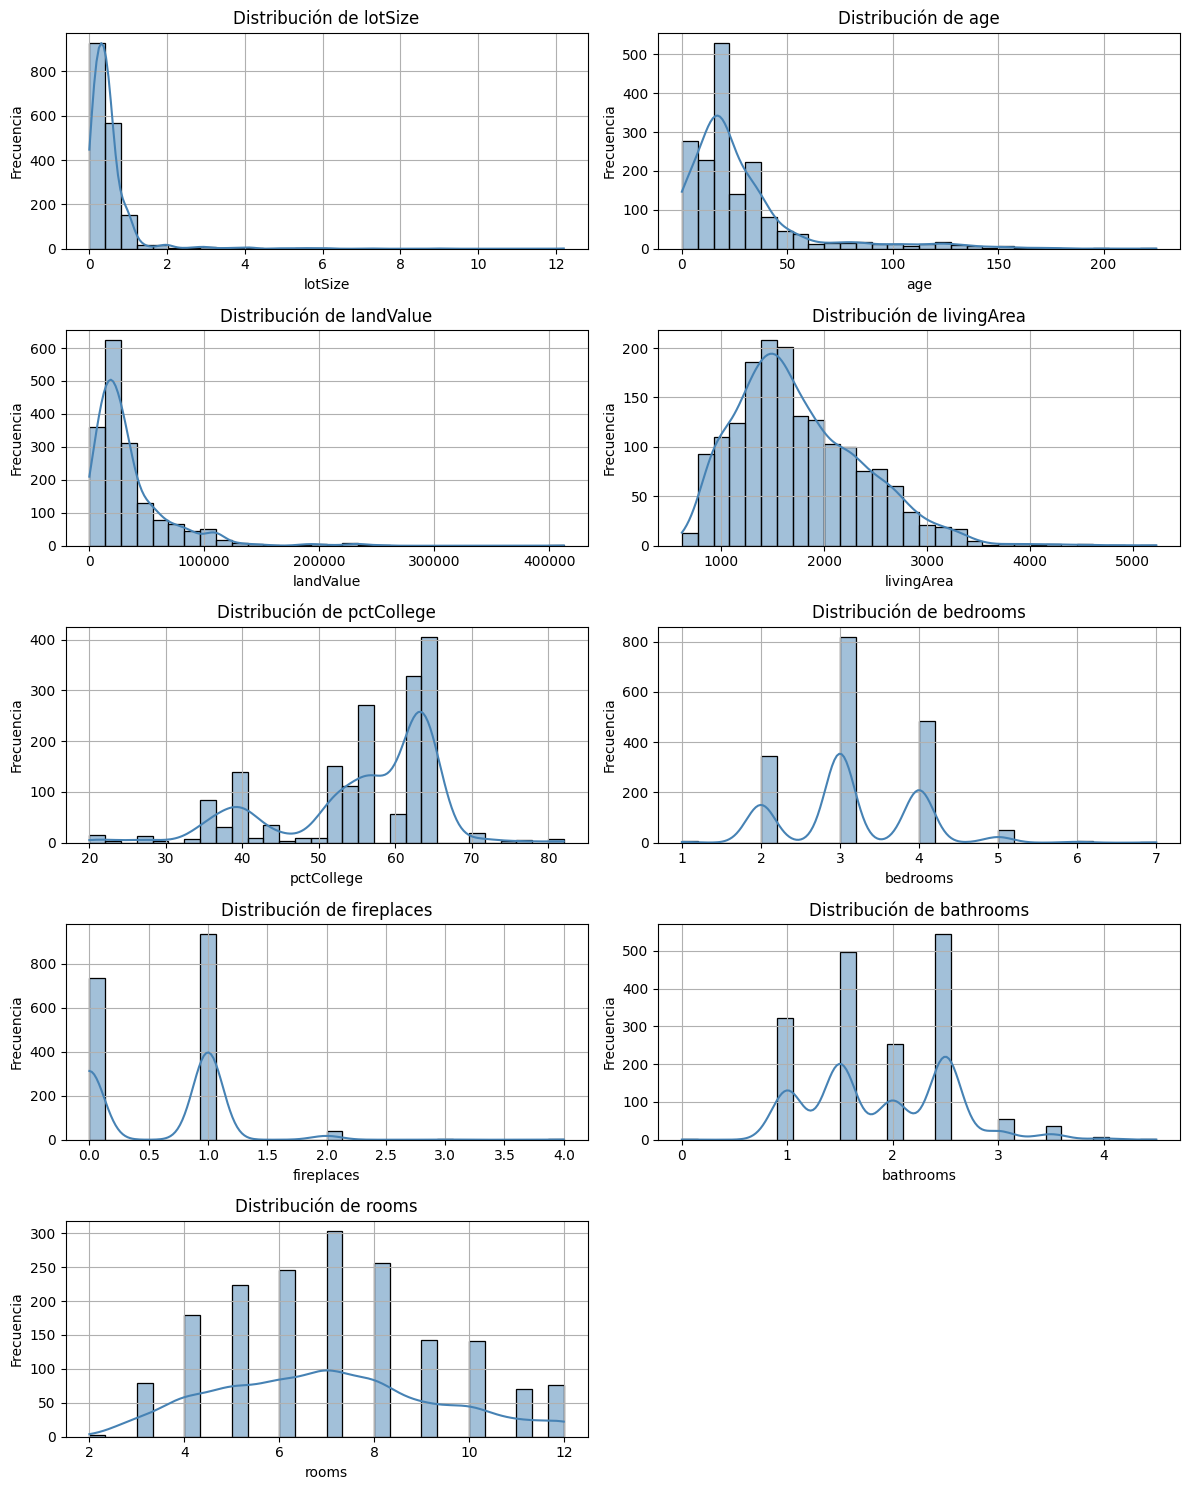

In [315]:
# Lista de variables numéricas (puedes ajustarla según tu dataset)
variables_numericas = df.select_dtypes(include=["number"]).columns.drop('price')

# Configurar cuadricula de subplots
n = len(variables_numericas)                                  # Total de variables numéricas
filas = int(np.ceil(n / 2))                                   # Número de filas necesarias para acomodar 2 gráficos por fila
fig, axes = plt.subplots(filas, 2, figsize=(12, filas * 3))   # Crear la figura y los ejes con subplots organizados en 'filas' x 2 columnas
axes = axes.flatten()                                         # Aplanar para indexar fácilmente

# Graficar cada variable numérica en su subplot correspondiente
# Este bucle recorre cada variable numérica y la grafica en su respectivo eje (axes[i])
# axes[i] es un objeto de tipo matplotlib.axes._axes.Axes, que representa una celda individual dentro de la cuadrícula de subplots
for i, col in enumerate(variables_numericas):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color="steelblue")  # Histograma con curva KDE
    axes[i].set_title(f"Distribución de {col}")                                     # Título del gráfico
    axes[i].set_xlabel(col)                                                         # Etiqueta del eje X
    axes[i].set_ylabel("Frecuencia")                                                # Etiqueta del eje Y
    axes[i].grid(True)                                                              # Activar cuadrícula para mejor lectura

# Ocultar ejes vacíos si hay número impar de variables
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajustar el diseño para que los gráficos no se encimen
plt.tight_layout()
# Guardar imagen
fig.savefig("Histogramas", dpi=300, bbox_inches="tight")
# Mostrar gráfico
plt.show()


### Visualización con boxplots

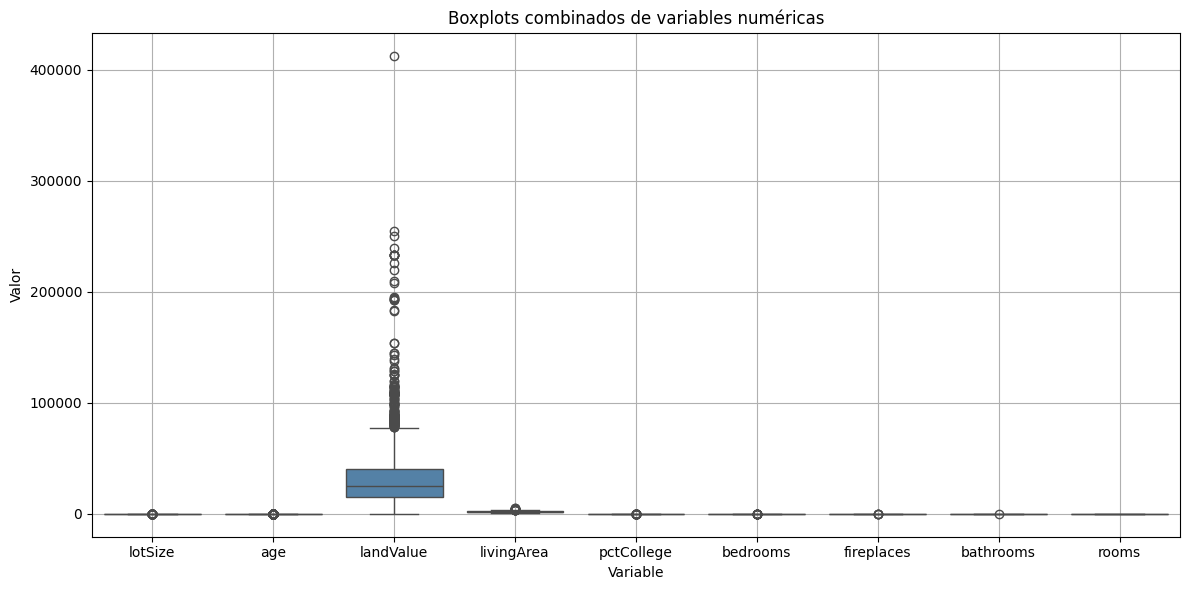

In [316]:
# Reorganizar el DataFrame para formato largo (long-form)
df_long = df[variables_numericas].melt(var_name="variable", value_name="valor")

# Crear boxplot combinado
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x="variable", y="valor", color="steelblue")

# Personalización
plt.title("Boxplots combinados de variables numéricas")
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.grid(True)

# Ajustar el diseño para que los gráficos no se encimen
plt.tight_layout()
# Guardar imagen
fig.savefig("Boxplots", dpi=300, bbox_inches="tight")
# Mostrar gráfico
plt.show()




### Matriz de correlación

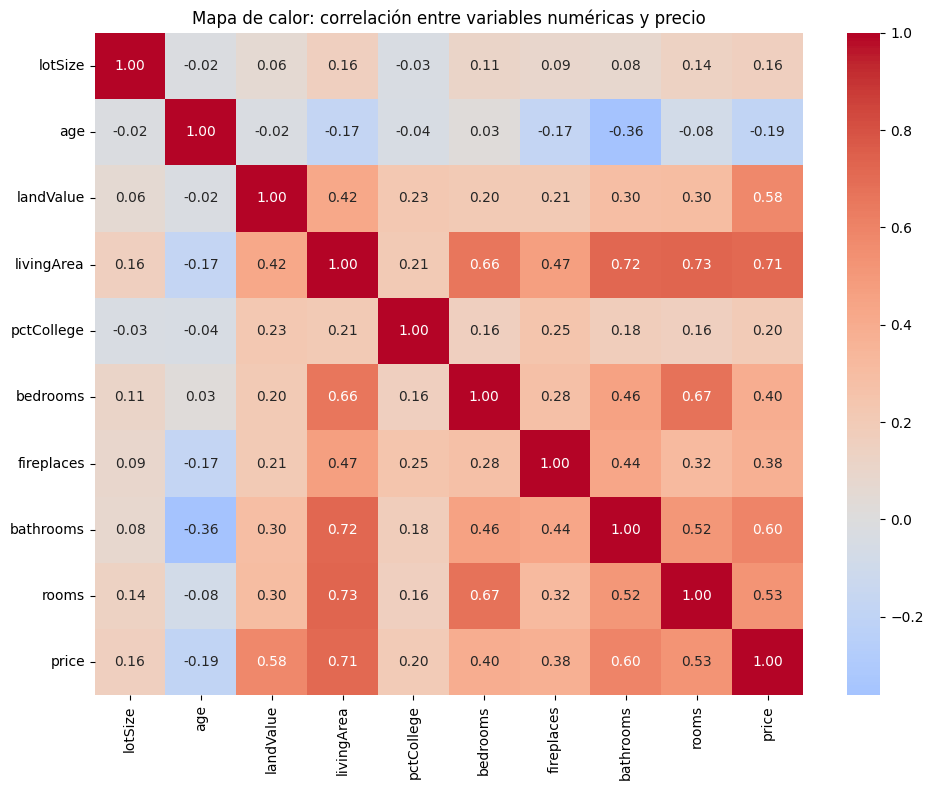

In [317]:
# Calcular la matriz de correlación
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Mapa de calor: correlación entre variables numéricas y precio")
plt.tight_layout()
plt.show()


# **Diagnostico de variables**

## Diagnostico de variables categoricas

In [318]:
# Lista de variables categoricas
variables_categoricas = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Diagnóstico de variables categoricas
diagnostico_categoricas = pd.DataFrame({
    "variable": variables_categoricas,
    "missing": [df[col].isna().sum() for col in variables_categoricas],
    "missing_%": [round(df[col].isna().mean() * 100, 2) for col in variables_categoricas],
    "cardinalidad": [df[col].nunique() for col in variables_categoricas],
    "moda": [df[col].mode()[0] for col in variables_categoricas]
})

diagnostico_categoricas

,variable,missing,missing_%,cardinalidad,moda
0,heating,0,0.0,3,hot air
1,fuel,0,0.0,3,gas
2,sewer,0,0.0,3,public/commercial
3,waterfront,0,0.0,2,No
4,newConstruction,0,0.0,2,No
5,centralAir,0,0.0,2,No


## Diagnóstico y recomendaciones automaticas de variables numéricas

In [319]:
# Lista para almacenar métricas y sugerencias por variable
anotaciones = []


# ---- VALORES FALTANTES -------------------------------------------------------
# Ciclo para calcular el numero de valores faltantes y el % que representan
for var in variables_numericas:
    serie = df[var]                                       # Extraer la serie original (incluye NaNs)
    n_total = len(serie)                                  # Total de observaciones (incluyendo faltantes)
    n_missing = serie.isna().sum()                        # Contar valores faltantes (NaNs)
    missing_pct = round(n_missing / n_total * 100, 2)     # Calcular % de valores faltantes


# ----VALORES ATÍPICOS ---------------------------------------------------------
    # Eliminar NaNs para análisis de distribución y calculo de estadisticas
    serie_valida = serie.dropna()

    # Se utiliza el criterio de Tukey para identificar valores atípicos en el conjunto de datos utilizando el rango intercuartílico
    # Calcular IQR y límites para detectar outliers
    q1 = serie_valida.quantile(0.25)                                                      # Primer cuartil
    q3 = serie_valida.quantile(0.75)                                                      # Tercer cuartil
    iqr = q3 - q1                                                                         # Rango intercuartílico (IQR)
    lim_inf = q1 - 1.5 * iqr                                                              # Límite inferior para outliers
    lim_sup = q3 + 1.5 * iqr                                                              # Límite superior para outliers
    outliers = serie_valida[(serie_valida < lim_inf) | (serie_valida > lim_sup)].count()  # Conteo de outliers
    outliers_pct = round(outliers / len(serie_valida) * 100, 2)                           # % de outliers sobre datos válidos


# ---- ASIMETRIA Y CURTOSIS ----------------------------------------------------
    # Calcular asimetría
    skew = round(serie_valida.skew(), 3) # Mide la asimetría de la distribución (si está sesgada hacia la izquierda o derecha)
    # Calcular curtosis (kurtosis)
    kurt = round(serie_valida.kurt(), 3) # mide la concentración en los extremos (colas) y la altura del pico central


# ---- IMPUTACION --------------------------------------------------------------
    # Heurística de imputación
    if outliers_pct >= 5 or abs(skew) >= 1.0:
        imputacion = "median"
    else:
        imputacion = "mean"

# ---- ESCALADO ----------------------------------------------------------------
    # Heurística de escalado
    if outliers_pct >= 5:
        escala = "RobustScaler"
    elif outliers_pct < 5 and abs(skew) <= 0.5:
        escala = "StandardScaler"
    else:
        escala = "MinMaxScaler"

# ---- ANOTACIONES -------------------------------------------------------------
    # Guardar anotaciones
    anotaciones.append({
        "variable": var,
        "missing": n_missing,
        "missing_%": missing_pct,
        "outliers_%": outliers_pct,
        "skew": skew,
        "kurtosis": kurt,
        "imputacion_sugerida": imputacion,
        "escalado_sugerido": escala
    })

# Convertir a DataFrame ordenado por % de outliers
print("Diagnóstico de columnas numéricas:\n")
diagnostico_numericas = pd.DataFrame(anotaciones).sort_values("outliers_%", ascending=False)
diagnostico_numericas


Diagnóstico de columnas numéricas:



,variable,missing,missing_%,outliers_%,skew,kurtosis,imputacion_sugerida,escalado_sugerido
2,landValue,0,0.0,9.66,3.092,16.108,median,RobustScaler
1,age,0,0.0,8.61,2.508,7.461,median,RobustScaler
0,lotSize,0,0.0,4.66,7.174,78.042,median,MinMaxScaler
4,pctCollege,0,0.0,2.39,-1.035,0.596,median,MinMaxScaler
5,bedrooms,0,0.0,1.05,0.399,0.670,mean,StandardScaler
3,livingArea,0,0.0,0.99,0.912,1.304,mean,MinMaxScaler
6,fireplaces,0,0.0,0.23,0.402,0.737,mean,StandardScaler
7,bathrooms,0,0.0,0.06,0.322,-0.433,mean,StandardScaler
8,rooms,0,0.0,0.00,0.280,-0.589,mean,StandardScaler


In [320]:
# Sugerencias de bloques numéricos (incluye median+Robust)
suggest_median_robust  = diagnostico_numericas.query("imputacion_sugerida=='median' and escalado_sugerido=='RobustScaler'")["variable"].tolist()
suggest_median_minmax  = diagnostico_numericas.query("imputacion_sugerida=='median' and escalado_sugerido=='MinMaxScaler'")["variable"].tolist()
suggest_median_std  = diagnostico_numericas.query("imputacion_sugerida=='median' and escalado_sugerido=='StandardScaler'")["variable"].tolist()
suggest_mean_robust = diagnostico_numericas.query("imputacion_sugerida=='mean' and escalado_sugerido=='RobustScaler'")["variable"].tolist()
suggest_mean_minmax = diagnostico_numericas.query("imputacion_sugerida=='mean' and escalado_sugerido=='MinMaxScaler'")["variable"].tolist()
suggest_mean_std = diagnostico_numericas.query("imputacion_sugerida=='mean' and escalado_sugerido=='StandardScaler'")["variable"].tolist()

print("\nSugerencias de bloques numéricos (auto):")
print("median+Robust   :", suggest_median_robust)
print("median+MinMax   :", suggest_median_minmax)
print("median+Standard :", suggest_median_std)
print("mean+Robust     :", suggest_mean_robust)
print("mean+MinMax     :", suggest_mean_minmax)
print("mean+Standard   :", suggest_mean_std)


Sugerencias de bloques numéricos (auto):
median+Robust   : ['landValue', 'age']
median+MinMax   : ['lotSize', 'pctCollege']
median+Standard : []
mean+Robust     : []
mean+MinMax     : ['livingArea']
mean+Standard   : ['bedrooms', 'fireplaces', 'bathrooms', 'rooms']


# **Preprocesamiento y reducción de dimensionalidad (PCA)**

## División en entrenamiento y prueba

In [321]:
# Separar variables predictoras (X) y objetivo (y)
X = df.drop(columns=["price"])
y = df["price"]

# Dividir el conjunto en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # Datos originales
    test_size=0.25,      # Proporción para prueba
    random_state=0,      # Semilla para reproducibilidad
    shuffle=True,        # Mezcla aleatoriamente las filas antes de dividir el dataset.
    #stratify=y          # Asegura que la proporción de clases en el conjunto de entrenamiento y prueba sea similar
)

print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (1288, 15)
Tamaño de X_test: (430, 15)
Tamaño de y_train: (1288,)
Tamaño de y_test: (430,)


In [322]:
# Dividir X_train y X_test en numericas y categoricas
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes(include=["object", "category"])
X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes(include=["object", "category"])

X_test_cat


,heating,fuel,sewer,waterfront,newConstruction,centralAir
1317,hot air,gas,public/commercial,No,No,Yes
1031,hot air,gas,septic,No,No,No
661,hot air,gas,public/commercial,No,No,Yes
970,hot water/steam,oil,septic,No,No,No
1610,hot water/steam,gas,septic,No,No,Yes
...,...,...,...,...,...,...
1018,hot air,gas,septic,No,No,Yes
619,hot air,gas,public/commercial,No,No,Yes
519,hot air,oil,public/commercial,No,No,No
1266,hot air,gas,public/commercial,No,No,Yes


## Columnas agrupadas por tipo de tratamiento

In [323]:
# ---- Listas de columnas ------------------------------------------------------

'''
Numéricas:
num_med_rob_cols: inputacion mediana con escalado robusto
num_med_minmax_cols: inputación mediana con escalado min_max
num_med_std_cols: inputacion mediana con escalado Estandar
num_mean_rob_cols: inputación media con escalado robusto
num_mean_minmax_cols: inputacion media con escalado min_max
num_mean_std_cols: inputacion media con escalado Estandar

Categóricas:
cat_onehot_cols: inputacion moda con OneHot
cat_ord_cols: inputacion moda con Ordinal
'''

# ---- Selección de columnas por tipo de tratamiento ---------------------------

'''
Heurística de imputación:
Si hay muchos atípicos (outliers_% ≥ 5%) o fuerte asimetría (|skew| ≥ 1.0) ⇒ usar median.
En otro caso ⇒ usar mean.

Heurística de escalado:
Si outliers_% ≥ 5% ⇒ usar RobustScaler.
Si no hay muchos outliers y la distribución es casi simétrica (|skew| ≤ 0.5) ⇒ usar StandardScaler.
En cualquier otro caso ⇒ usar MinMaxScaler (por defecto).

'''

cols_median_robust = ['age', 'lotSize', 'livingArea', 'landValue']       # mediana + Robust
cols_median_minmax = ['pctCollege']       # mediana + MinMax
cols_median_std = []       # mediana + Estandar
cols_mean_robust = []      # media + Robust
cols_mean_minmax  = []     # media + MinMax
cols_mean_std  = ['bedrooms', 'fireplaces', 'bathrooms', 'rooms']     # media + Standard

cols_onehot = ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']      # moda + OneHot
cols_ord = []                # moda + Ordinal


passthrough_cols = []                      # pasar sin procesar
drop_cols        = []                      # eliminar

# Orden de las categorías ordinales
categorias_ordinales = [
    [],
    []
]


## Pipelines de preprocesamiento

In [324]:
# ---- Pipelines NUMÉRICOS -----------------------------------------------------

pipe_median_robust = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  RobustScaler())
])

pipe_median_minmax = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  MinMaxScaler())
])

'''pipe_median_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])'''


'''pipe_mean_robust = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  RobustScaler())
])'''

'''pipe_mean_minmax = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  MinMaxScaler())
])'''

pipe_mean_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])

# --- Pipelines CATEGÓRICOS ----------------------------------------------------

pipe_cat_onehot = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # moda
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

'''pipe_cat_ord = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # moda
    ("encoder", OrdinalEncoder(categories=categorias_ordinales,
                               handle_unknown="use_encoded_value", unknown_value=-1))
])'''


'pipe_cat_ord = Pipeline(steps=[\n    ("imputer", SimpleImputer(strategy="most_frequent")),  # moda\n    ("encoder", OrdinalEncoder(categories=categorias_ordinales,\n                               handle_unknown="use_encoded_value", unknown_value=-1))\n])'

## Construcción de `ColumnTransformer` para preprocesamiento

En este bloque preprocessor es un objeto ColumnTransformer que agrupa:

- Pipelines numéricos (imputación + escalado)
- Pipelines categóricos (imputación + codificación)
- Columnas que se pasan sin procesar (passthrough)
- Columnas que se eliminan (drop)

In [325]:
# --- ColumnTransformer unificado ---

'''Cada tupla aplica un pipeline (pipe_mean_rob) a un grupo de columnas (num_mean_rob_cols)

num_med_rob → alias interno del bloque
pipe_mean_rob → el pipeline que se va a aplicar
num_mean_rob_cols → la lista de columnas a las que se aplica
'''

preprocessor_cat = ColumnTransformer(
    transformers=[
        ("cat_onehot",      pipe_cat_onehot,  cols_onehot),
        #("cat_ord",      pipe_cat_ord,  cols_ord),

        # Passthrough (sin preprocesar)
        #("passthrough",  "passthrough", passthrough_cols),

        # Drop explícito
        #("drop_high_na", "drop", drop_cols),
    ],
    remainder="drop",                        # descarta cualquier otra columna no listada
    verbose_feature_names_out=False          # Devuelve solo el nombre original de la columna, sin prefijo (False)
)


preprocessor_num = ColumnTransformer(
    transformers=[
        ("num_median_robust", pipe_median_robust, cols_median_robust),
        ("num_median_minmax", pipe_median_minmax, cols_median_minmax),
        #("num_median_std", pipe_median_std, cols_median_std),
        #("num_mean_robust",  pipe_mean_robust,  cols_mean_robust),
        #("num_mean_minmax",  pipe_mean_minmax,  cols_mean_minmax),
        ("num_mean_std",  pipe_mean_std,  cols_mean_std),

        # Passthrough (sin preprocesar)
        ("passthrough",  "passthrough", passthrough_cols),

        # Drop explícito
        ("drop_high_na", "drop", drop_cols),
    ],
    remainder="drop",                        # descarta cualquier otra columna no listada
    verbose_feature_names_out=False          # Devuelve solo el nombre original de la columna, sin prefijo (False)
)



## Preprocesamiento de variables categoricas

In [326]:
# ---- AJUSTE ------------------------------------------------------------------

# Ajustar el transformador solo con datos de entrenamiento
preprocessor_cat.fit(X_train_cat)

# ---- TRANSFORMACION ----------------------------------------------------------

# Aplica las transformaciones aprendidas a X_train y X_test
X_train_cat_transformed = preprocessor_cat.transform(X_train_cat)
X_test_cat_transformed = preprocessor_cat.transform(X_test_cat)

#X_train_cat_transformed

## Aplicacion de PCA para estimar todo el espectro


In [327]:
# Pipeline para estimar TODO el espectro de PCA
pca_pipe_full = Pipeline(steps=[
    ("pre", preprocessor_num),               # Tu preprocesador numérico para imputación/escalado
    ("std_for_pca", StandardScaler()),       # Re-estandarización para correlaciones
    ("pca", PCA(n_components=None, svd_solver="full", random_state=0))
])

# FIT solo con entrenamiento (sin transform)
pca_pipe_full.fit(X_train_num)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_median_robust',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'lotSize',
                                                   'livingArea', 'landValue']),
                                                 ('num_median_minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pctCollege']),
                                                 ('num_mean_std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'fireplaces',
                                                   'bathrooms', 'rooms']),
                                                 ('passthrough', 'passthrough',
                                                  []),
                                                 ('drop_high_na', 'drop', [])],
                                   verbose_feature_names_out=False)),
                ('std_for_pca', StandardScaler()),
                ('pca', PCA(random_state=0, svd_solver='full'))])

In [328]:
# Extraer objeto PCA desde el pipeline
pca_model_full = pca_pipe_full.named_steps["pca"]

# Extraer espectro de varianza
expl = pca_model_full.explained_variance_ratio_
cum_expl = np.cumsum(expl)
ks = np.arange(1, len(expl) + 1)

# Sugerencias de k
k_90 = np.searchsorted(cum_expl, 0.90) + 1
k_95 = np.searchsorted(cum_expl, 0.95) + 1

# Codo por segunda diferencia (curvatura)
curvatura = np.diff(np.diff(expl))
k_elbow = np.argmax(-curvatura) + 2 if len(curvatura) else 1

# Reporte
print("Varianza explicada (primeros 5):", np.round(expl[:5], 6))
print("Acumulada (primeros 5):         ", np.round(cum_expl[:5], 6))
print(f"Sugerencias → k@90%={k_90}, k@95%={k_95}, k(elbow)={k_elbow}")


Varianza explicada (primeros 5): [0.390135 0.129604 0.116904 0.101843 0.087361]
Acumulada (primeros 5):          [0.390135 0.519739 0.636643 0.738486 0.825847]
Sugerencias → k@90%=6, k@95%=8, k(elbow)=6


## Análisis gráfico de PCA (Antes de calcular T)

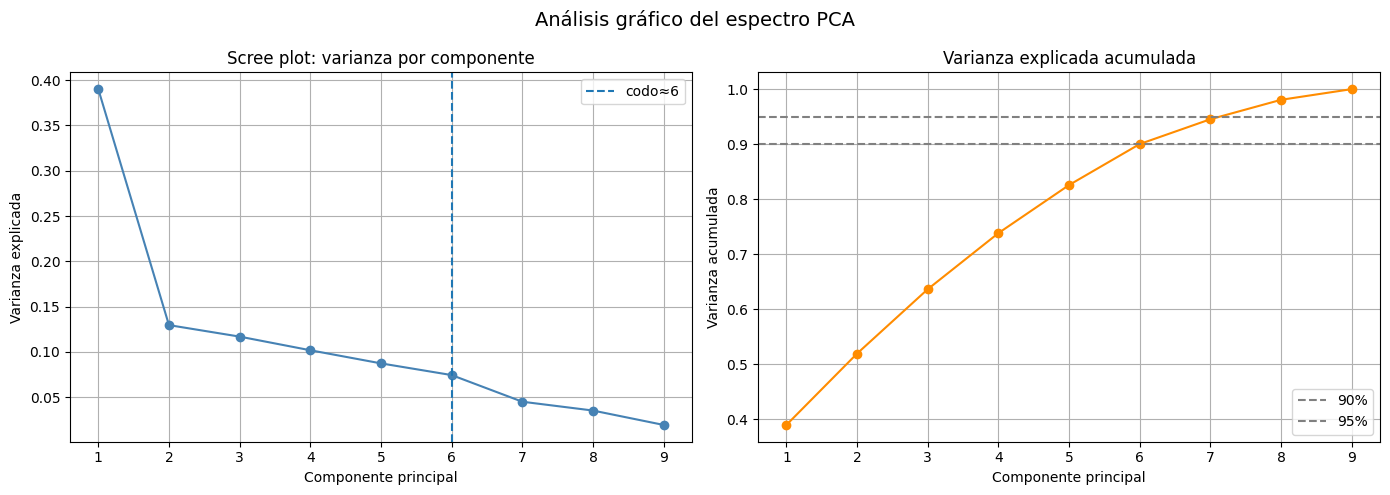

In [329]:
# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Scree plot
axes[0].plot(ks, expl, marker='o', color='steelblue')
axes[0].set_title("Scree plot: varianza por componente")
axes[0].set_xlabel("Componente principal")
axes[0].set_ylabel("Varianza explicada")
axes[0].axvline(k_elbow, linestyle="--", label=f"codo≈{k_elbow}")
axes[0].legend()
axes[0].grid(True)

# Varianza acumulada
axes[1].plot(ks, cum_expl, marker='o', color='darkorange')
axes[1].axhline(y=0.90, color='gray', linestyle='--', label="90%")
axes[1].axhline(y=0.95, color='gray', linestyle='--', label="95%")
axes[1].set_title("Varianza explicada acumulada")
axes[1].set_xlabel("Componente principal")
axes[1].set_ylabel("Varianza acumulada")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Análisis gráfico del espectro PCA", fontsize=14)
plt.tight_layout()
plt.show()

## Aplicación de PCA utilizando el número óptimo de componentes k


In [330]:
# K óptimo
k= k_elbow

# Pipeline final para PCA con K componentes
pca_pipe_final = Pipeline(steps=[
    ("pre", preprocessor_num),                                             # Tu preprocesador (imputación, etc.)
    ("std_for_pca", StandardScaler()),                                     # Re-estandarización para correlaciones
    ("pca", PCA(n_components=k, svd_solver="full", random_state=0))        # Usa el K óptimo
])

# Ajustar solo con entrenamiento
pca_pipe_final.fit(X_train_num)

# Transformar ambos conjuntos
X_train_pca_transformed = pca_pipe_final.transform(X_train_num)
X_test_pca_transformed = pca_pipe_final.transform(X_test_num)

# Extraer objeto PCA desde el pipeline
pca_model_final = pca_pipe_final.named_steps["pca"]

# Extraer espectro de varianza
expl = pca_model_final.explained_variance_ratio_
cum_expl = np.cumsum(expl)

print("Varianza explicada:", np.round(expl, 6))
print("Acumulada:         ", np.round(cum_expl, 6))


Varianza explicada: [0.390135 0.129604 0.116904 0.101843 0.087361 0.074444]
Acumulada:          [0.390135 0.519739 0.636643 0.738486 0.825847 0.900291]


In [331]:
import plotly.express as px
import pandas as pd

# Crear DataFrame con los dos primeros componentes
df_pca_2d = pd.DataFrame({
    "PC1": X_train_pca_transformed[:, 0],
    "PC2": X_train_pca_transformed[:, 1],
    #"Target": y_train  # Usar en caso de que target sea categorica
    })

# Crear gráfico interactivo
fig = px.scatter(
    df_pca_2d,
    x="PC1",
    y="PC2",
    title="Proyección 2D de los componentes principales (PCA)",
    labels={
        "PC1": f"Componente 1 ({expl[0]*100:.1f}% varianza)",
        "PC2": f"Componente 2 ({expl[1]*100:.1f}% varianza)"
        },
    #color = "",       # Usar en caso de que target sea categorica
    opacity=0.85
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(width=1000, height=600)
fig.show()


In [332]:
import plotly.express as px
import pandas as pd

# Crear DataFrame con los tres primeros componentes
df_pca_3d = pd.DataFrame({
    "PC1": X_train_pca_transformed[:, 0],
    "PC2": X_train_pca_transformed[:, 1],
    "PC3": X_train_pca_transformed[:, 2],
    #"Target": y_train  # Usar en caso de que target sea categorica
})

# Crear gráfico interactivo 3D
fig = px.scatter_3d(
    df_pca_3d,
    x="PC1",
    y="PC2",
    z="PC3",
    title="Proyección 3D de los componentes principales (PCA)",
    labels={
        "PC1": f"Componente 1 ({expl[0]*100:.1f}% varianza)",
        "PC2": f"Componente 2 ({expl[1]*100:.1f}% varianza)",
        "PC3": f"Componente 3 ({expl[2]*100:.1f}% varianza)"
    },
    #color = "",       # Usar en caso de que target sea categorica
    opacity=0.85
)

fig.update_traces(marker=dict(size=4, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(width=900, height=700)
fig.show()


## Reconstrucción de DataFrame con variables transformadas

Se reconstruyen los conjuntos `T_train_final` y `T_test_final` concatenando los componentes principales obtenidos por PCA con las variables categóricas codificadas. Los nombres de las columnas se generan automáticamente para mantener trazabilidad.   

- `T_train_final`: matriz de entrenamiento con componentes principales + categóricas codificadas

- `T_test_final`: matriz de prueba con la misma estructura

Esta estructura está lista para ser utilizada en modelos supervisados.


In [333]:
# Crear nombres para los componentes principales
n_comp = X_train_pca_transformed.shape[1]
# Genera una lista de nombres como ["PC1", "PC2", ..., "PCk"] para los componentes principales obtenidos por PCA
cols_pca = [f"PC{i+1}" for i in range(n_comp)]

# Reconstruir DataFrames con nombres
# Convierte las matrices transformadas por PCA en DataFrames
# con nombres de columnas (cols_pca) y los mismos índices que los datos originales.
X_train_pca_df = pd.DataFrame(X_train_pca_transformed, columns=cols_pca, index=X_train.index)
X_test_pca_df  = pd.DataFrame(X_test_pca_transformed, columns=cols_pca, index=X_test.index)

# Reconstruir DataFrames categóricos codificados
# Convierte las matrices codificadas en DataFrames con nombres de columnas legibles y el índice original.
# get_feature_names_out() genera nombres como "sex_1", "sex_2", etc.
X_train_cat_df = pd.DataFrame(X_train_cat_transformed, columns=preprocessor_cat.get_feature_names_out(), index=X_train.index)
X_test_cat_df  = pd.DataFrame(X_test_cat_transformed, columns=preprocessor_cat.get_feature_names_out(), index=X_test.index)

# Concatenar horizontalmente
# Une los componentes principales y las variables categóricas codificadas en un solo DataFrame por filas (horizontalmente)
T_train_final = pd.concat([X_train_pca_df, X_train_cat_df], axis=1)
T_test_final  = pd.concat([X_test_pca_df, X_test_cat_df], axis=1)


In [334]:
# Verificar que ambas matrices tengan las mismas columnas
cols_train = T_train_final.columns
cols_test = T_test_final.columns

# Comparar columnas
if list(cols_train) == list(cols_test):
    print("Las columnas de X_train_final y X_test_final están alineadas.")
else:
    print("Las columnas no coinciden. Diferencias:")
    diff_train = set(cols_train) - set(cols_test)
    diff_test = set(cols_test) - set(cols_train)
    if diff_train:
        print("  - En train pero no en test:", sorted(diff_train))
    if diff_test:
        print("  - En test pero no en train:", sorted(diff_test))

# Verificar dimensiones
print(f"\nDimensiones:")
print(f"  T_train_final: {T_train_final.shape}")
print(f"  T_test_final: {T_test_final.shape}")
print(f"\nT_train_final:\n {T_train_final}")


Las columnas de X_train_final y X_test_final están alineadas.

Dimensiones:
  T_train_final: (1288, 21)
  T_test_final: (430, 21)

T_train_final:
            PC1       PC2       PC3       PC4       PC5       PC6  \
231  -0.276920 -0.642359 -0.393789 -0.097924 -0.151540  0.721599   
971   1.645793 -0.800673  0.459823  0.397383  0.556896  0.110364   
991   1.202848  0.213202  0.426680 -0.021795 -0.890292  0.022758   
1122 -1.907295 -0.095893 -0.165868  0.975658 -0.456905 -1.204620   
432  -0.279265 -0.559393 -0.302561  0.243915 -0.678462  0.553153   
...        ...       ...       ...       ...       ...       ...   
835   1.812703  1.038969  0.642752 -0.606935 -1.453148 -0.243004   
1216  4.385456 -1.172668  1.899900  1.267887  3.673244  1.371523   
1653 -0.780921 -0.779591 -1.144407  0.016822 -0.393156  2.758696   
559   0.076002 -1.437209 -0.229529  0.268876  0.183010  0.556114   
684   5.882031 -0.257468  0.215232  0.322656  3.373781 -0.597518   

      heating_electric  heating_hot 

In [335]:
# Agregar la columna objetivo al final de cada DataFrame

T_train_final_target = T_train_final.copy()
T_test_final_target = T_test_final.copy()

T_train_final_target["target"] = y_train.values
T_test_final_target["target"]  = y_test.values

# Concatenar ambos conjuntos
T_train_test_final = pd.concat([T_train_final_target, T_test_final_target], ignore_index=True)
T_train_test_final



,PC1,PC2,PC3,PC4,PC5,PC6,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,...,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes,target
0,-0.276920,-0.642359,-0.393789,-0.097924,-0.151540,0.721599,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,166500
1,1.645793,-0.800673,0.459823,0.397383,0.556896,0.110364,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,292500
2,1.202848,0.213202,0.426680,-0.021795,-0.890292,0.022758,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,196500
3,-1.907295,-0.095893,-0.165868,0.975658,-0.456905,-1.204620,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,145000
4,-0.279265,-0.559393,-0.302561,0.243915,-0.678462,0.553153,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,-0.730816,-0.081060,0.402600,-0.306404,-0.010694,-1.188546,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,279000
1714,0.624308,-1.154608,0.129839,-0.061825,0.420128,0.515528,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,327355
1715,-1.057549,-0.140190,0.001336,-0.563783,-0.498590,-0.737859,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,154000
1716,2.268109,-0.625284,0.148659,-0.505867,-0.203030,-0.290184,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,382500


In [336]:
# Guardado en csv de los conjuntos finales

T_train_final.to_csv("T_train_final.csv", index=False)
T_test_final.to_csv("T_test_final.csv", index=False)
T_train_final_target.to_csv("T_train_final_target.csv", index=False)
T_test_final_target.to_csv("T_test_final_target.csv", index=False)
T_train_test_final.to_csv("T_train_test_final.csv", index=False) # T_train_final_target + T_test_final_target

In [337]:
T_train_test_final

,PC1,PC2,PC3,PC4,PC5,PC6,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,...,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes,target
0,-0.276920,-0.642359,-0.393789,-0.097924,-0.151540,0.721599,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,166500
1,1.645793,-0.800673,0.459823,0.397383,0.556896,0.110364,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,292500
2,1.202848,0.213202,0.426680,-0.021795,-0.890292,0.022758,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,196500
3,-1.907295,-0.095893,-0.165868,0.975658,-0.456905,-1.204620,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,145000
4,-0.279265,-0.559393,-0.302561,0.243915,-0.678462,0.553153,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,-0.730816,-0.081060,0.402600,-0.306404,-0.010694,-1.188546,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,279000
1714,0.624308,-1.154608,0.129839,-0.061825,0.420128,0.515528,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,327355
1715,-1.057549,-0.140190,0.001336,-0.563783,-0.498590,-0.737859,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,154000
1716,2.268109,-0.625284,0.148659,-0.505867,-0.203030,-0.290184,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,382500


## Visualización de variables numéricas escaladas (antes de PCA)


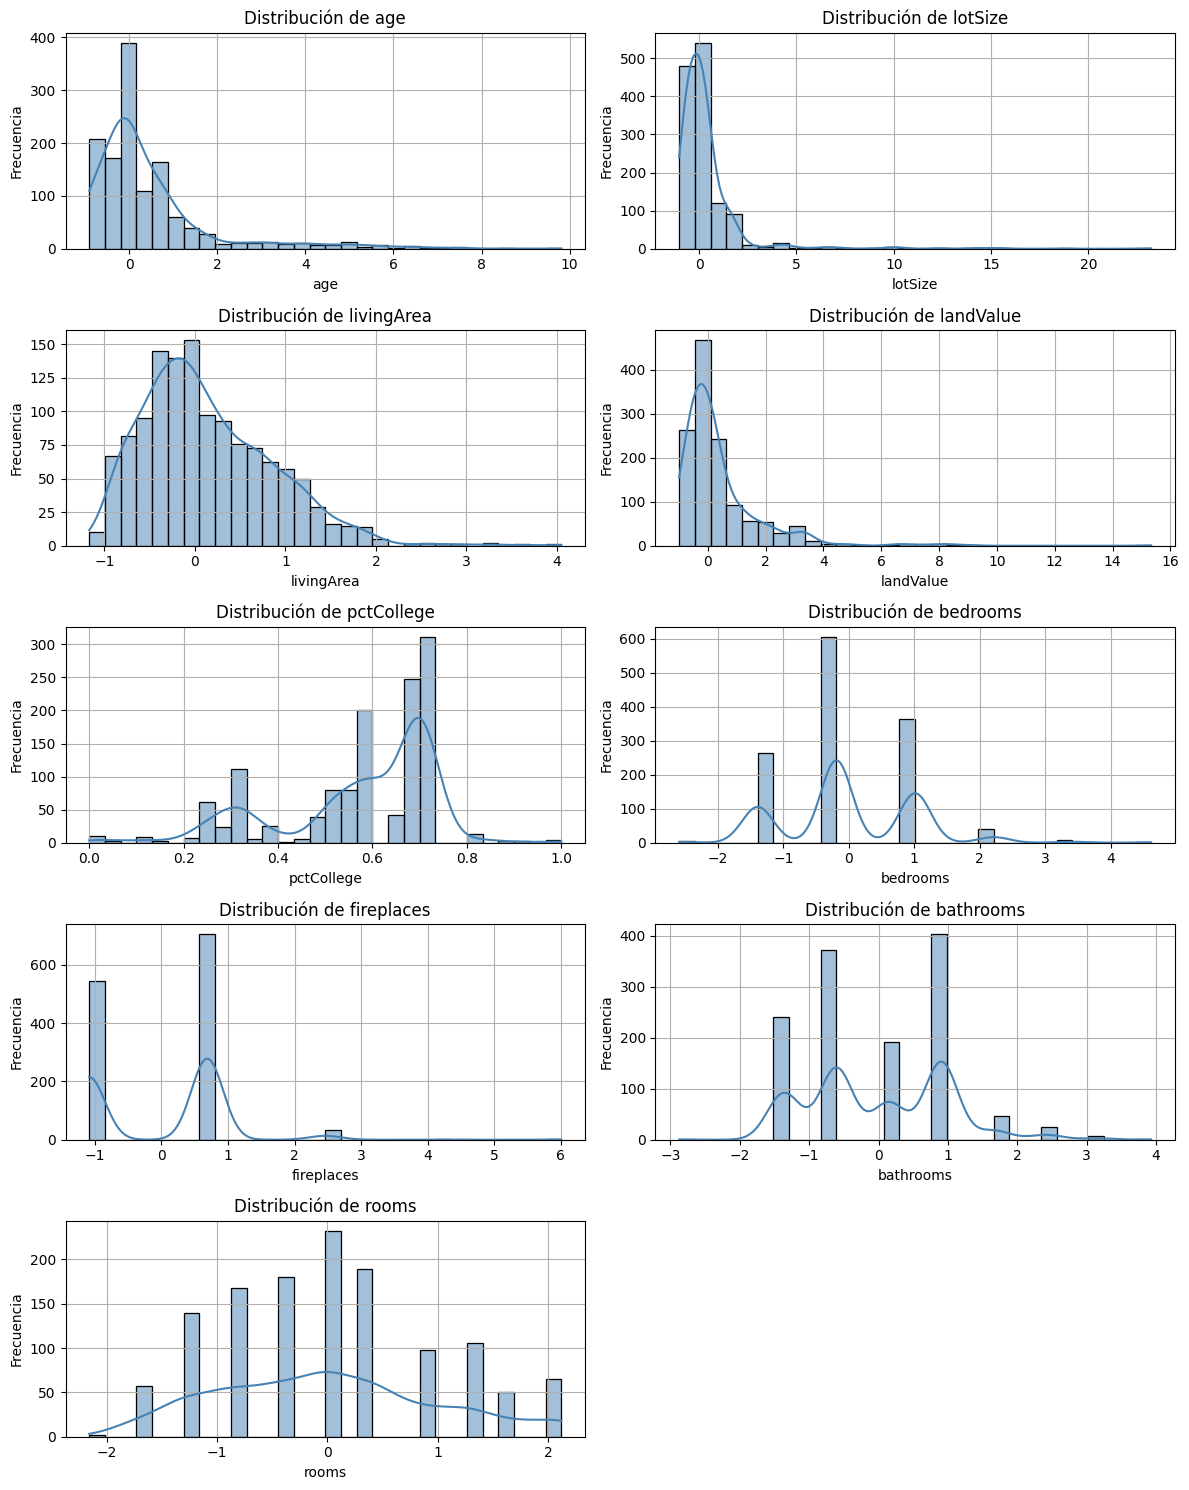

In [338]:
# Extraer el paso "pre" del pipeline ya ajustado
pre = pca_pipe_final.named_steps["pre"]

# Aplicar solo ese paso a los datos de entrenamiento
X_train_num_pre = pre.transform(X_train_num)

# Obtener los nombres de las variables transformadas
columnas_pre = pre.get_feature_names_out(X_train_num.columns)

# Convertir a DataFrame para visualización
numericas_pre = pd.DataFrame(X_train_num_pre, columns=columnas_pre)

# Obtener columnas
cols_numericas_pre = numericas_pre.columns

# Configurar cuadricula de subplots
n = len(cols_numericas_pre)                                  # Total de variables numéricas
filas = int(np.ceil(n / 2))                                   # Número de filas necesarias para acomodar 2 gráficos por fila
fig, axes = plt.subplots(filas, 2, figsize=(12, filas * 3))   # Crear la figura y los ejes con subplots organizados en 'filas' x 2 columnas
axes = axes.flatten()                                         # Aplanar para indexar fácilmente

# Graficar cada variable numérica en su subplot correspondiente
# Este bucle recorre cada variable numérica y la grafica en su respectivo eje (axes[i])
# axes[i] es un objeto de tipo matplotlib.axes._axes.Axes, que representa una celda individual dentro de la cuadrícula de subplots
for i, col in enumerate(cols_numericas_pre):
    sns.histplot(data=numericas_pre , x=col, kde=True, bins=30, ax=axes[i], color="steelblue")  # Histograma con curva KDE
    axes[i].set_title(f"Distribución de {col}")                                     # Título del gráfico
    axes[i].set_xlabel(col)                                                         # Etiqueta del eje X
    axes[i].set_ylabel("Frecuencia")                                                # Etiqueta del eje Y
    axes[i].grid(True)                                                              # Activar cuadrícula para mejor lectura

# Ocultar ejes vacíos si hay número impar de variables
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajustar el diseño para que los gráficos no se encimen
plt.tight_layout()
# Guardar imagen
fig.savefig("Histogramas_pre", dpi=300, bbox_inches="tight")
# Mostrar gráfico
plt.show()



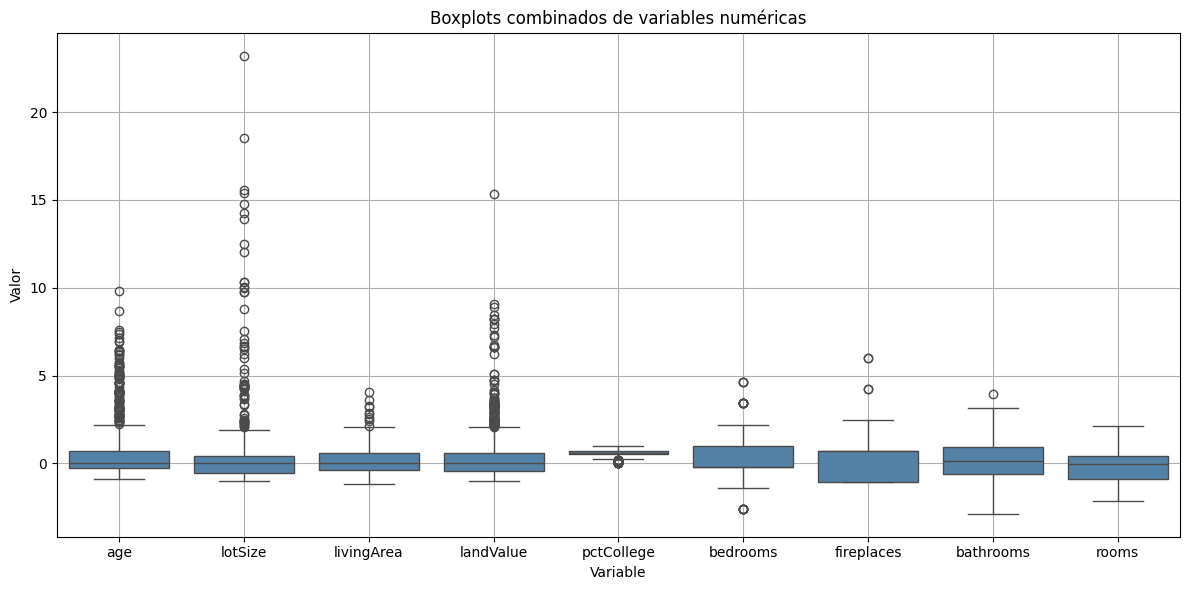

In [339]:
# Reorganizar el DataFrame para formato largo (long-form)
df_long = numericas_pre[cols_numericas_pre].melt(var_name="variable", value_name="valor")

# Crear boxplot combinado
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x="variable", y="valor", color="steelblue")

# Personalización
plt.title("Boxplots combinados de variables numéricas")
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.grid(True)

# Ajustar el diseño para que los gráficos no se encimen
plt.tight_layout()
# Guardar imagen
fig.savefig("Boxplots_pre", dpi=300, bbox_inches="tight")
# Mostrar gráfico
plt.show()


## Guardado de artectos clave y archivos complementarios

In [340]:
import joblib
import json
import zipfile
import os

# ---- DIRECTORIO --------------------------------------------------------------

# Crear carpeta para artefactos si no existe
os.makedirs("artifacts_preprocessing_PCA", exist_ok=True)

# ---- PREPROCESADORES/PIPELINES -----------------------------------------------

# Guardar pipeline de PCA para variables numéricas
joblib.dump(pca_pipe_final, "artifacts_preprocessing_PCA/pca_pipe_num.joblib")

# Guardar codificador de variables categóricas
joblib.dump(preprocessor_cat, "artifacts_preprocessing_PCA/preprocessor_cat.joblib")

# ---- METADATOS ---------------------------------------------------------------

# Extraer nombres
cols_num = X_train_num.columns.tolist()                                    # Columnas numericas originales
cols_cat = X_train_cat.columns.tolist()                                    # Columnas categoricas originales
pca_cols = [f"PC{i+1}" for i in range(X_train_pca_transformed.shape[1])]   # Nombres de PCs (PC1, PC2, etc) --> Numericas transformadas
coded_cat_cols = preprocessor_cat.get_feature_names_out().tolist()         # Columnas categoricas codificadas y transformadas

# Guardar metadatos
pca_metadata = {
    "cols_num": cols_num,
    "cols_cat": cols_cat,
    "pca_cols": pca_cols,
    "coded_cat_cols": coded_cat_cols,
    "explained_variance": [float(v) for v in expl],  # ← convierte a float nativo
    "k_elbow": int(k_elbow)                          # ← convierte a int nativo
}

with open("artifacts_preprocessing_PCA/pca_metadata.json", "w") as f:
    json.dump(pca_metadata, f, indent=2)

# ---- GUARDADO DE ARCHIVOS EN ZIP ---------------------------------------------

# Lista de archivos que quieres incluir en el zip
archivos_a_guardar = [
    "T_train_final.csv",
    "T_test_final.csv",
    "T_train_final_target.csv",
    "T_test_final_target.csv",
    "T_train_test_final.csv",
    "Boxplots.png",
    "Histogramas.png",
    "Boxplots_pre.png",
    "Histogramas_pre.png",
    "Saratoga.csv",
    "artifacts_preprocessing_PCA/pca_pipe_num.joblib",
    "artifacts_preprocessing_PCA/preprocessor_cat.joblib",
    "artifacts_preprocessing_PCA/pca_metadata.json"
]

# Nombre del archivo zip final
zip_name = "notebook_outputs_and_artifacts_PCA.zip"

# Crear el archivo zip
with zipfile.ZipFile(zip_name, "w") as zipf:
    for archivo in archivos_a_guardar:
        zipf.write(archivo)

print(f"Archivo '{zip_name}' creado con éxito.")
print("Archivos incluidos:")
for archivo in archivos_a_guardar:
    print(f"  - {archivo}")



Archivo 'notebook_outputs_and_artifacts_PCA.zip' creado con éxito.
Archivos incluidos:
  - T_train_final.csv
  - T_test_final.csv
  - T_train_final_target.csv
  - T_test_final_target.csv
  - T_train_test_final.csv
  - Boxplots.png
  - Histogramas.png
  - Boxplots_pre.png
  - Histogramas_pre.png
  - Saratoga.csv
  - artifacts_preprocessing_PCA/pca_pipe_num.joblib
  - artifacts_preprocessing_PCA/preprocessor_cat.joblib
  - artifacts_preprocessing_PCA/pca_metadata.json


# **Aplicacion de PCA a datos nuevos**

In [341]:
import pandas as pd
import joblib
import json

# Deben cargarse los archivos
# - preprocessor_cat.joblib
# - pca_pipe_num.joblib
# - pca_metadata.json
# - T_train_final_target.csv
# - csv de tus nuevos datos
# Devolverá T_new_final_pca.csv: el csv de PCA aplicado a los nuevos datos

# ---- CARGAR ARTEFACTOS -------------------------------------------------------
preprocessor_cat = joblib.load("artifacts_preprocessing_PCA/preprocessor_cat.joblib")
pca_pipe = joblib.load("artifacts_preprocessing_PCA/pca_pipe_num.joblib")

with open("artifacts_preprocessing_PCA/pca_metadata.json", "r") as f:
    meta = json.load(f)

cols_num       = meta["cols_num"]
cols_cat       = meta["cols_cat"]
pca_cols       = meta["pca_cols"]
coded_cat_cols = meta["coded_cat_cols"]
expl           = meta["explained_variance"]

# ---- CARGAR DATOS DE ENTRENAMIENTO -------------------------------------------
T_train_final_target = pd.read_csv("T_train_final_target.csv")
X_train_pca = T_train_final_target[pca_cols]
y_train = T_train_final_target["target"]

# ---- CARGAR DATOS NUEVOS -----------------------------------------------------
df_new = pd.read_csv("Saratoga_desconocidos.csv")

# ---- SEPARAR VARIABLES -------------------------------------------------------
df_new_num = df_new[cols_num]
df_new_cat = df_new[cols_cat]

# ---- APLICAR TRANSFORMACIONES ------------------------------------------------

# Categóricas
new_cat_T = preprocessor_cat.transform(df_new_cat)
df_new_cat_T = pd.DataFrame(new_cat_T, columns=coded_cat_cols, index=df_new.index)

# Numéricas → PCA
new_num_T = pca_pipe.transform(df_new_num)
df_new_num_T = pd.DataFrame(new_num_T, columns=pca_cols, index=df_new.index)

# ---- CONCATENAR RESULTADO FINAL ----------------------------------------------
T_new_final_pca = pd.concat([df_new_num_T, df_new_cat_T], axis=1)

# === Guardar resultado ===
T_new_final_pca.to_csv("T_new_final_pca.csv", index=False)
print("Transformación completa. Archivo guardado como 'T_new_final_pca.csv'.")


Transformación completa. Archivo guardado como 'T_new_final_pca.csv'.


In [342]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Datos de entrenamiento
df_train_2d = pd.DataFrame({
    "PC1": X_train_pca["PC1"],
    "PC2": X_train_pca["PC2"],
    #"Specie": y_train
})

# Datos nuevos
df_new_2d = pd.DataFrame({
    "PC1": T_new_final_pca["PC1"],
    "PC2": T_new_final_pca["PC2"]
})

# Crear figura base con datos de entrenamiento
fig = px.scatter(
    df_train_2d,
    x="PC1",
    y="PC2",
    #color="Specie",
    title="Proyección 2D de los componentes principales (PCA)",
    labels={
        "PC1": f"Componente 1 ({expl[0]*100:.1f}% varianza)",
        "PC2": f"Componente 2 ({expl[1]*100:.1f}% varianza)"
    },
    opacity=0.85,
)

# Agregar puntos nuevos como trace separado
fig.add_trace(go.Scatter(
    x=df_new_2d["PC1"],
    y=df_new_2d["PC2"],
    mode="markers+text",  # muestra puntos y texto
    name="nuevos",
    text=df_new_2d.index.astype(str),  # usa el índice como etiqueta
    textposition="top center",         # posición del texto
    opacity=0.85,
    marker=dict(size=10, line=dict(width=1)) # Tamaño de figura y borde, tambien se puede agregar color
    ),

)

# Ajustes finales
fig.update_layout(width=1000, height=600)
fig.show()

In [343]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Datos de entrenamiento
df_train_3d = pd.DataFrame({
    "PC1": X_train_pca["PC1"],
    "PC2": X_train_pca["PC2"],
    "PC3": X_train_pca["PC3"],
    #"Specie": y_train
})

# Datos nuevos
df_new_3d = pd.DataFrame({
    "PC1": T_new_final_pca["PC1"],
    "PC2": T_new_final_pca["PC2"],
    "PC3": T_new_final_pca["PC3"]
})

# Crear figura base con datos de entrenamiento
fig = px.scatter_3d(
    df_train_3d,
    x="PC1",
    y="PC2",
    z="PC3",
    #color="Specie",
    title="Proyección 3D de los componentes principales (PCA)",
    labels={
        "PC1": f"Componente 1 ({expl[0]*100:.1f}% varianza)",
        "PC2": f"Componente 2 ({expl[1]*100:.1f}% varianza)",
        "PC3": f"Componente 3 ({expl[2]*100:.1f}% varianza)"
    },
    opacity=0.85
)
fig.update_traces(marker=dict(size=5))  # ajusta el tamaño de los puntos

# Agregar puntos nuevos como trace separado
fig.add_trace(go.Scatter3d(
    x=df_new_3d["PC1"],
    y=df_new_3d["PC2"],
    z=df_new_3d["PC3"],
    mode="markers+text",
    name="Nuevos",
    text=df_new_3d.index.astype(str),
    textposition="top center",
    marker=dict(
        size=5,
        line=dict(width=1)
    ),
    opacity=0.85
))

# Ajustes finales
fig.update_layout(width=900, height=700)
fig.show()


# **Regresion Lineal**

In [344]:
#####################################################
#
# APLICAR Regresión lineal a datos preprocesados con PCA
#
#####################################################
# Deben cargarse los archivos
# - T_train_final_target.csv
# - T_test_final_target.csv
# - T_train_test_final.csv
# - pca_pipe_num.joblib
# - pca_metadata.json
# Devolverá
# expected_columns.json (columnas que deberán tener datos que nunca ha visto)
# modelo_reg_lineal.pkl (modelo ya entrenado)
#####################################################

import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


df_reg_lin = pd.read_csv("T_train_test_final.csv")
df_reg_lin.head()

,PC1,PC2,PC3,PC4,PC5,PC6,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,...,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes,target
0,-0.276920,-0.642359,-0.393789,-0.097924,-0.151540,0.721599,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,166500
1,1.645793,-0.800673,0.459823,0.397383,0.556896,0.110364,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,292500
2,1.202848,0.213202,0.426680,-0.021795,-0.890292,0.022758,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,196500
3,-1.907295,-0.095893,-0.165868,0.975658,-0.456905,-1.204620,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,145000
4,-0.279265,-0.559393,-0.302561,0.243915,-0.678462,0.553153,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,180000


## Separación de los datos en entrenamiento y prueba


In [345]:
# Separar variables predictoras (X) y objetivo (y)
X = df_reg_lin.drop(columns=["target"])
y = df_reg_lin["target"]

# Dividir el conjunto en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # Datos originales
    test_size=0.25,      # Proporción para prueba
    random_state=0,      # Semilla para reproducibilidad
    shuffle=False,        # Mezcla aleatoriamente las filas antes de dividir el dataset.
    #stratify=y          # Asegura que la proporción de clases en el conjunto de entrenamiento y prueba sea similar
)

print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (1288, 21)
Tamaño de X_test: (430, 21)
Tamaño de y_train: (1288,)
Tamaño de y_test: (430,)


## Detectar columnas a eliminar y aplicar Transformador

In [346]:
# columnas categoricas
categoricas = variables_categoricas

# Identificar columnas codificadas por cada variable
drop_cols = []
for cat in categoricas:
    cols_cat = [col for col in X_train.columns if col.startswith(cat + "_")]
    if len(cols_cat) >= 2:
        drop_cols.append(cols_cat[0])  # eliminar solo si hay más de una


# Transformador que elimina columnas
dropper = ColumnTransformer(
    transformers=[("drop_cat_base", "drop", drop_cols)],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
)


## Entrenamiento del modelo de regresión lineal

In [347]:
# Pipeline para aplicar transformador y regresión lineal
mi_regresion_lineal = Pipeline([
    ("dropper", dropper),
    ("linreg", LinearRegression(fit_intercept=True)),
])

# Entrenar
mi_regresion_lineal.fit(X_train, y_train)

Pipeline(steps=[('dropper',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop_cat_base', 'drop',
                                                  ['heating_electric',
                                                   'fuel_electric',
                                                   'sewer_none',
                                                   'waterfront_No',
                                                   'newConstruction_No',
                                                   'centralAir_No'])],
                                   verbose_feature_names_out=False)),
                ('linreg', LinearRegression())])

## Extracción e interpretación de coeficientes del modelo

In [348]:
# Extraer intercepto y coeficientes
modelo = mi_regresion_lineal.named_steps["linreg"]
intercepto = modelo.intercept_
coefs = modelo.coef_

# Obtener nombres de variables transformadas después del dropper
features = mi_regresion_lineal.named_steps["dropper"].get_feature_names_out(X_train.columns)

# Mostrar los estimadores beta_0,beta_1,...,beta_p
print(f"Intercepto (β₀): {intercepto:.3f}")
pd.DataFrame({"Variable": features, "Coeficiente (βᵢ)": coefs}).style.format({"Coeficiente (βᵢ)": "{:.3f}"})

Intercepto (β₀): 232284.106


,Variable,Coeficiente (βᵢ)
0,PC1,39603.868
1,PC2,-6202.914
2,PC3,3252.243
3,PC4,4285.281
4,PC5,31712.853
5,PC6,-1440.647
6,heating_hot air,4860.649
7,heating_hot water/steam,-10290.405
8,fuel_gas,3159.103
9,fuel_oil,2457.000


## Recuperación de coeficientes en el espacio post-`pre`

In [349]:
# === Betas en espacio post-`pre` (antes del StandardScaler de la PCA) ===
import joblib, json

# 1) Cargar el pipeline numérico usado en PCA_full
pca_pipe = joblib.load("artifacts_preprocessing_PCA/pca_pipe_num.joblib")
pca    = pca_pipe.named_steps["pca"]            # PCA(n_components=k)
scaler = pca_pipe.named_steps["std_for_pca"]    # StandardScaler
pre    = pca_pipe.named_steps["pre"]            # ColumnTransformer (pre)

# 2) Extraer objetos necesarios
C   = pca.components_            # (k, p)
mu  = scaler.mean_               # (p,)
sig = scaler.scale_              # (p,)
pre_feature_names = pre.get_feature_names_out() # nombres de las p numéricas post-`pre`

# 3) Aislar betas de PCs del modelo (según prefijo)
pc_prefix = "PC"
pc_mask   = np.array([c.startswith(pc_prefix) for c in features], dtype=bool)
beta_PC   = coefs[pc_mask]                     # (k,)

# 4) Back-transform: PCs -> estandarizadas -> post-`pre`
#    gamma = C^T * beta_PC   (p,)
gamma       = C.T @ beta_PC
alpha_pre   = gamma / sig                      # betas por cada variable numérica post-`pre` (p,)
beta0_pre   = intercepto - np.sum(gamma * (mu / sig))  # intercepto en el mismo espacio

# 5) Empaquetar resultados
betas_post_pre_df = pd.DataFrame({
    "feature_post_pre": pre_feature_names,
    "Coeficiente (βᵢ)_post_pre":    alpha_pre
})


with open("artifacts_preprocessing_PCA/pca_metadata.json", "r", encoding="utf-8") as f:
    meta = json.load(f)

orden_original_num = meta["cols_num"]  # orden original de columnas numéricas
presentes = set(betas_post_pre_df["feature_post_pre"].tolist())
orden_final = [c for c in orden_original_num if c in presentes]

betas_post_pre_df = (
    betas_post_pre_df
    .set_index("feature_post_pre")
    .loc[orden_final]
    .reset_index()
)

# Mostrar los estimadores beta_0,beta_1,...,beta_p
print(f"Intercepto post `pre` (β₀): {beta0_pre:.3f}")
print("\nBetas numéricas (post `pre`, en orden original):")
display(betas_post_pre_df.style.format({"Coeficiente (βᵢ)_post_pre": "{:.3f}"}))

Intercepto post `pre` (β₀): 221829.776

Betas numéricas (post `pre`, en orden original):


,feature_post_pre,Coeficiente (βᵢ)_post_pre
0,lotSize,2815.531
1,age,-5671.426
2,landValue,27617.753
3,livingArea,28781.225
4,pctCollege,-4751.624
5,bedrooms,4200.502
6,fireplaces,7047.747
7,bathrooms,18155.215
8,rooms,13003.467


## Evaluación del modelo: métricas en test y train


In [350]:
# === Predicción en TEST ===
yhat_test = mi_regresion_lineal.predict(X_test)

# Métricas básicas en test
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

r2_test   = r2_score(y_test, yhat_test)
rmse_test = math.sqrt(mean_squared_error(y_test, yhat_test))
mae_test  = mean_absolute_error(y_test, yhat_test)

print({"R2_test": r2_test, "RMSE_test": rmse_test, "MAE_test": mae_test})

# También en train, para comparar generalización
yhat_train = mi_regresion_lineal.predict(X_train)
r2_train   = r2_score(y_train, yhat_train)
rmse_train = math.sqrt(mean_squared_error(y_train, yhat_train))
mae_train  = mean_absolute_error(y_train, yhat_train)
print({"R2_train": r2_train, "RMSE_train": rmse_train, "MAE_train": mae_train})

# (Opcional) residuals de test rápidos
resid_test = y_test - yhat_test
print("Resumen residuos test:", pd.Series(resid_test).describe().to_string())

{'R2_test': 0.6327038827065105, 'RMSE_test': 54163.427852744295, 'MAE_test': 40089.82014271017}
{'R2_train': 0.6346084744952033, 'RMSE_train': 61173.29503005177, 'MAE_train': 42750.84035936761}
Resumen residuos test: count       430.000000
mean       -101.931223
std       54226.422621
min     -200076.929058
25%      -33720.955085
50%       -3733.635064
75%       28229.979958
max      255489.882793


## Interpretación del modelo y veredicto

In [351]:
# Veredicto

# NRMSE y mejora vs media en TEST
std_y_test = float(np.std(y_test, ddof=0))
nrmse_test = rmse_test / (std_y_test + 1e-12)
mejora_pct = 100.0 * (1.0 - nrmse_test)  # % mejor que predecir la media

# Semáforo (sin CV), "aquí dentro"
verde   = (r2_test >= 0.70) and (nrmse_test <= 0.50)
amarilo = (0.40 <= r2_test < 0.70) or (0.50 < nrmse_test <= 0.80)
if verde:
    veredicto = "VERDE"
    significado = "confiable para predecir aquí dentro."
elif amarilo:
    veredicto = "AMARILLO"
    significado = "usable con cautela (depende del caso de uso)"
else:
    veredicto = "ROJO"
    significado = "no confiable para predicción aquí dentro"

# Generar explicación humanizada automáticamente
def generar_explicacion(r2_test, nrmse_test, mejora_pct, rmse_test, mae_test, veredicto):
    explicacion = []

    # Explicación basada en R²
    if r2_test >= 0.8:
        explicacion.append(f"• El modelo explica un {r2_test:.1%} de la variabilidad en los datos, lo que indica un excelente ajuste.")
        explicacion.append("  🎯 **Analogía**: Como un pronóstico del tiempo que acierta 8 de cada 10 días - muy confiable.")
    elif r2_test >= 0.6:
        explicacion.append(f"• El modelo captura un {r2_test:.1%} de la variabilidad, mostrando una buena capacidad predictiva.")
        explicacion.append("  🎯 **Analogía**: Similar a un forecast económico que identifica correctamente las tendencias principales.")
    elif r2_test >= 0.4:
        explicacion.append(f"• Con un R² del {r2_test:.1%}, el modelo tiene capacidad predictiva moderada.")
        explicacion.append("  🎯 **Analogía**: Como un detector de lluvia que funciona bien para saber si lloverá, pero no cuánto.")
    else:
        explicacion.append(f"• El R² de {r2_test:.1%} sugiere que el modelo tiene capacidad predictiva limitada.")
        explicacion.append("  🎯 **Analogía**: Parecido a adivinar el clima lanzando una moneda - mejor que nada, pero poco confiable.")

    # Explicación basada en NRMSE
    if nrmse_test <= 0.3:
        explicacion.append(f"• Los errores de predicción son muy bajos ({nrmse_test:.1%} de la variabilidad total).")
        explicacion.append("  📏 **Analogía**: Como medir con una regla milimetrada - alta precisión en las estimaciones.")
    elif nrmse_test <= 0.5:
        explicacion.append(f"• Los errores son moderados ({nrmse_test:.1%} de la variabilidad total).")
        explicacion.append("  📏 **Analogía**: Similar a usar una cinta métrica - útil para la mayoría de propósitos prácticos.")
    elif nrmse_test <= 0.7:
        explicacion.append(f"• Los errores son considerables ({nrmse_test:.1%} de la variabilidad total).")
        explicacion.append("  📏 **Analogía**: Como estimar distancias a ojo - sirve para aproximaciones gruesas.")
    else:
        explicacion.append(f"• Los errores son muy altos ({nrmse_test:.1%} de la variabilidad total).")
        explicacion.append("  📏 **Analogía**: Parecido a adivinar el tamaño de algo desde lejos - muy impreciso.")

    # Explicación basada en mejora vs media
    if mejora_pct > 50:
        explicacion.append(f"• Es un {mejora_pct:.0f}% mejor que simplemente predecir el promedio, una mejora sustancial.")
        explicacion.append("  🚀 **Analogía**: Como usar GPS vs. solo un mapa de carreteras - mucho más eficiente.")
    elif mejora_pct > 20:
        explicacion.append(f"• Mejora en un {mejora_pct:.0f}% respecto a predecir la media.")
        explicacion.append("  🚀 **Analogía**: Similar a tener indicaciones de tráfico en tiempo real - claramente mejor que sin ellas.")
    elif mejora_pct > 0:
        explicacion.append(f"• Solo un {mejora_pct:.0f}% mejor que predecir el promedio, mejora marginal.")
        explicacion.append("  🚀 **Analogía**: Como tener una brújula en lugar de solo el norte - ayuda, pero no demasiado.")
    else:
        explicacion.append("• No mejora respecto a predecir el valor promedio.")
        explicacion.append("  🚀 **Analogía**: Como intentar navegar sin brújula ni mapa - no aporta ventaja.")

    # Comparación entre train y test (si estuvieran disponibles ambos)
    if 'r2_train' in locals():
        sobreajuste = r2_train - r2_test
        if sobreajuste > 0.2:
            explicacion.append(f"• Hay indicios de sobreajuste (R² train: {r2_train:.3f} vs test: {r2_test:.3f}).")
            explicacion.append("  ⚠️ **Analogía**: Como un estudiante que memoriza las respuestas pero no entiende el concepto.")
        elif sobreajuste < 0.05:
            explicacion.append("• El modelo generaliza bien, sin signos evidentes de sobreajuste.")
            explicacion.append("  ✅ **Analogía**: Similar a un atleta que entrena y compite igual de bien - consistente.")

    # Interpretación del veredicto con analogías finales
    if veredicto == "VERDE":
        explicacion.append("\n✅ **Conclusión**: El modelo es confiable para hacer predicciones en contextos similares a los datos de prueba.")
        explicacion.append("🎯 **Analogía final**: Como un piloto automático confiable - puedes usarlo para navegar con seguridad.")
    elif veredicto == "AMARILLO":
        explicacion.append("\n⚠️ **Conclusión**: Úsalo con precaución - puede ser útil para identificar tendencias pero no para predicciones precisas.")
        explicacion.append("🎯 **Analogía final**: Como el forecast de fin de semana - útil para planear, pero lleva paraguas por si acaso.")
    else:
        explicacion.append("\n❌ **Conclusión**: Se recomienda revisar las variables o considerar modelos alternativos.")
        explicacion.append("🎯 **Analogía final**: Como un mapa muy antiguo - mejor conseguir uno actualizado o usar otros métodos.")

    return "\n".join(explicacion)

# Generar la explicación
explicacion_humanizada = generar_explicacion(
    r2_test, nrmse_test, mejora_pct, rmse_test, mae_test, veredicto
)

resumen = {
    "R2_test": r2_test,
    "MAE_test": mae_test,
    "RMSE_test": rmse_test,
    "std(y_test)": std_y_test,
    "NRMSE_test": nrmse_test,
    "Mejora_vs_media_%": mejora_pct,
    "Veredicto": veredicto,
    "significado": significado
}

df_resumen = pd.DataFrame(resumen, index=[0]).T
df_resumen.columns = ["Valor"]
df_resumen.index.name = "Métrica"

print(df_resumen)
print("\n" + "="*60)
print("EXPLICACIÓN DEL VEREDICTO:")
print("="*60)
print(explicacion_humanizada)

def explicacion_breve(r2_test, nrmse_test, mejora_pct, veredicto):
    base = f"Con un R² de {r2_test:.3f} y un error relativo (NRMSE) de {nrmse_test:.3f}, "

    # Añadir analogías a la versión breve también
    if veredicto == "VERDE":
        analogia = "Como un GPS confiable - puedes seguir sus indicaciones con seguridad."
        return base + f"el modelo es robusto y explica bien los patrones en los datos, siendo {mejora_pct:.0f}% mejor que usar promedios simples. {analogia}"
    elif veredicto == "AMARILLO":
        analogia = "Similar a un pronóstico de lluvia - útil para planear, pero lleva sombrilla por si acaso."
        return base + f"el modelo tiene capacidad predictiva limitada ({mejora_pct:.0f}% mejor que promedios), adecuado para análisis exploratorios pero no para decisiones críticas. {analogia}"
    else:
        analogia = "Como un mapa desactualizado - mejor buscar herramientas más precisas."
        return base + f"el modelo no supera significativamente las predicciones básicas ({mejora_pct:.0f}% mejora), recomendando revisar el enfoque. {analogia}"

print("\n" + "🔍 RESUMEN INTERPRETATIVO:")
print("="*40)
print(explicacion_breve(r2_test, nrmse_test, mejora_pct, veredicto))

                                                          Valor
Métrica                                                        
R2_test                                                0.632704
MAE_test                                           40089.820143
RMSE_test                                          54163.427853
std(y_test)                                        89371.278984
NRMSE_test                                              0.60605
Mejora_vs_media_%                                      39.39504
Veredicto                                              AMARILLO
significado        usable con cautela (depende del caso de uso)

EXPLICACIÓN DEL VEREDICTO:
• El modelo captura un 63.3% de la variabilidad, mostrando una buena capacidad predictiva.
  🎯 **Analogía**: Similar a un forecast económico que identifica correctamente las tendencias principales.
• Los errores son considerables (60.6% de la variabilidad total).
  📏 **Analogía**: Como estimar distancias a ojo - sirve para aproxim

## Guardado del modelo y archivos complementarios

In [352]:
###### Guardado del modelo

import joblib, json, time

# guarda el pipeline completo (dropper + LinearRegression)
joblib.dump(mi_regresion_lineal, "modelo_reg_lineal.pkl")

# guarda el orden/esperado de columnas de entrenamiento
expected_cols = X_train.columns.tolist()
with open("expected_columns.json", "w", encoding="utf-8") as f:
    json.dump({"columns": expected_cols, "saved_at": time.strftime("%Y-%m-%d %H:%M:%S")}, f)

print("Artefactos guardados:", "modelo_reg_lineal.pkl", "expected_columns.json")

Artefactos guardados: modelo_reg_lineal.pkl expected_columns.json


In [353]:
import os, zipfile, glob

# Carpeta destino en tu PC
dst_dir = r"mi_regresion_lineal"
os.makedirs(dst_dir, exist_ok=True)
zip_path = os.path.join(dst_dir, "mi_reg_lin_artifacts_bundle.zip")

# Archivos que quieres incluir (ajusta si te falta alguno)
candidates = [
    "modelo_reg_lineal.pkl",
    "expected_columns.json",
]

present = [f for f in candidates if os.path.exists(f)]
# Si quieres incluir una carpeta (p. ej., 'sample_data'), descomenta:
# for root, _, files in os.walk("sample_data"):
#     for f in files:
#         present.append(os.path.join(root, f))

with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for f in present:
        zf.write(f, arcname=os.path.basename(f))  # guarda sin subcarpetas

print("ZIP creado en:", zip_path)
print("Incluidos:", present)


ZIP creado en: mi_regresion_lineal/mi_reg_lin_artifacts_bundle.zip
Incluidos: ['modelo_reg_lineal.pkl', 'expected_columns.json']


# **Regresión Lineal (NUEVOS)**

In [354]:
#####################################################
#
# APLICAR Regresión lineal a datos NUEVOS preprocesados con PCA
#
#####################################################
# Deben cargarse los archivos
# - T_new_final_pca.csv (son los datos nuevos ya preprocesados con PCA)
# - expected_columns.json
# - modelo_reg_lineal.pkl
#
# Devolverá
# Regresion_lineal_nuevos_predicciones.csv: csv de T_new_final_pca con las predicciones de la regresión lineal
#####################################################

# ===== Carga del modelo y predicción en datos nuevos =====
import pandas as pd
import joblib, json

# Cargar artefactos
modelo = joblib.load("modelo_reg_lineal.pkl")
with open("expected_columns.json", "r", encoding="utf-8") as f:
    expected_cols = json.load(f)["columns"]

# Usar en un lote nuevo
df_nuevo = pd.read_csv("T_new_final_pca.csv")
y_pred  = modelo.predict(df_nuevo)

out = df_nuevo.copy()
out["yhat"] = y_pred.round(2)
out.to_csv("Regresion_lineal_nuevos_predicciones.csv", index=False)
print("✅ Predicciones guardadas en: Regresion_lineal_nuevos_predicciones.csv")

✅ Predicciones guardadas en: Regresion_lineal_nuevos_predicciones.csv


# **Regresión Regularizada**

In [355]:
#####################################################
#
# APLICAR Regresión lineal a datos preprocesados con PCA
# y elegir el mejor modelo después de regularizacion
#
#####################################################
# Deben cargarse los archivos
# - T_train_final_objetivo.csv
# - T_test_final_objetivo.csv"
# - pca_pipe_num.joblib
# - pca_metadata.json
#
# Devolverá
# - reg_lin_ganador_bundle.zip
#####################################################

import pandas as pd
import numpy as np
import math
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# === Carga de datos ===
df_reg_reg= pd.read_csv("T_train_test_final.csv")
df_reg_reg.head()


,PC1,PC2,PC3,PC4,PC5,PC6,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,...,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes,target
0,-0.276920,-0.642359,-0.393789,-0.097924,-0.151540,0.721599,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,166500
1,1.645793,-0.800673,0.459823,0.397383,0.556896,0.110364,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,292500
2,1.202848,0.213202,0.426680,-0.021795,-0.890292,0.022758,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,196500
3,-1.907295,-0.095893,-0.165868,0.975658,-0.456905,-1.204620,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,145000
4,-0.279265,-0.559393,-0.302561,0.243915,-0.678462,0.553153,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,180000


In [356]:
# Separar variables predictoras (X) y objetivo (y)
X = df_reg_reg.drop(columns=["target"])
y = df_reg_reg["target"]

# Dividir el conjunto en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # Datos originales
    test_size=0.25,      # Proporción para prueba
    random_state=0,      # Semilla para reproducibilidad
    shuffle=False,        # Mezcla aleatoriamente las filas antes de dividir el dataset.
    #stratify=y          # Asegura que la proporción de clases en el conjunto de entrenamiento y prueba sea similar
)

print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (1288, 21)
Tamaño de X_test: (430, 21)
Tamaño de y_train: (1288,)
Tamaño de y_test: (430,)


In [357]:
# columnas categoricas
categoricas = variables_categoricas

# Identificar columnas codificadas por cada variable
drop_cols = []
for cat in categoricas:
    cols_cat = [col for col in X_train.columns if col.startswith(cat + "_")]
    if len(cols_cat) >= 2:
        drop_cols.append(cols_cat[0])  # eliminar solo si hay más de una


# Transformador que elimina columnas
dropper = ColumnTransformer(
    transformers=[("drop_cat_base", "drop", drop_cols)],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
)

dropper.fit(X_train)


ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('drop_cat_base', 'drop',
                                 ['heating_electric', 'fuel_electric',
                                  'sewer_none', 'waterfront_No',
                                  'newConstruction_No', 'centralAir_No'])],
                  verbose_feature_names_out=False)

In [358]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

base_feats = dropper.get_feature_names_out()

alphas  = np.logspace(-3, 3, 25)
l1_grid = [0.2, 0.5, 0.8]

modelos = {
    "OLS": LinearRegression(),
    "Ridge": RidgeCV(alphas=alphas),
    "Lasso": LassoCV(alphas=alphas, cv=5, max_iter=5000, random_state=42),
    "ElasticNet": ElasticNetCV(l1_ratio=l1_grid, alphas=alphas, cv=5, max_iter=5000, random_state=42),
}

res = []                 # métricas por modelo (en TEST)
series_por_modelo = {}   # coeficientes en PRE por modelo (incluye intercepto)
params_cv = {}

for nombre, base in modelos.items():
    # cada candidato se ajusta (fit) con el MISMO dropper ya configurado
    pipe = Pipeline([("dropper", dropper), ("model", base)])
    pipe.fit(X_train, y_train)

    # ----- Métricas en TEST -----
    yhat = pipe.predict(X_test)
    r2   = r2_score(y_test, yhat)
    rmse = math.sqrt(mean_squared_error(y_test, yhat))
    mae  = mean_absolute_error(y_test, yhat)
    res.append((nombre, r2, rmse, mae))

    # ----- Coeficientes en PRE -----
    model_step = pipe.named_steps["model"]
    # ----- Hiperparámetros seleccionados (si aplica) -----
    alpha_sel = getattr(model_step, "alpha_", getattr(model_step, "alpha", None))
    l1_sel    = getattr(model_step, "l1_ratio_", getattr(model_step, "l1_ratio", None))
    params_cv[nombre] = {
    "alpha": float(alpha_sel) if alpha_sel is not None else None,
    "l1_ratio": float(l1_sel) if l1_sel is not None else None
    }
    coef  = getattr(model_step, "coef_", None)
    inter = getattr(model_step, "intercept_", None)

    s = pd.Series(index=list(base_feats) + ["(intercepto)"], dtype=float)
    if coef is not None:
        s.loc[base_feats] = coef
    s.loc["(intercepto)"] = inter if inter is not None else np.nan
    series_por_modelo[nombre] = s
print("\nHiperparámetros por modelo:")
for k, v in params_cv.items():
    print(f"- {k}: alpha={v['alpha']}, l1_ratio={v['l1_ratio']}")


Hiperparámetros por modelo:
- OLS: alpha=None, l1_ratio=None
- Ridge: alpha=1.7782794100389228, l1_ratio=None
- Lasso: alpha=177.82794100389228, l1_ratio=None
- ElasticNet: alpha=0.005623413251903491, l1_ratio=0.5


In [359]:
# ===== Guardar métricas =====
df_res = pd.DataFrame(res, columns=["modelo", "R2", "RMSE", "MAE"])
# Criterio: R2 desc, luego RMSE asc, luego MAE asc
df_res = df_res.sort_values(by=["R2", "RMSE", "MAE"], ascending=[False, True, True])
# criterio_seleccion: R2(desc) → RMSE(asc) → MAE(asc)")
df_res.to_csv("comparacion_regularizacion.csv", index=False)
print(df_res)

       modelo        R2          RMSE           MAE
2       Lasso  0.635677  53943.782121  39833.629797
1       Ridge  0.633491  54105.384667  39987.810892
3  ElasticNet  0.633071  54136.383265  39991.554534
0         OLS  0.632704  54163.427853  40089.820143


In [360]:
# ===== Guardar coeficientes (ESPACIO PCA) =====
df_coef_ancho = pd.DataFrame(series_por_modelo)
df_coef_ancho = df_coef_ancho.reindex(columns=list(modelos.keys()))
orden_filas   = ["(intercepto)"] + list(base_feats)
df_coef_ancho = df_coef_ancho.reindex(index=orden_filas)
df_coef_ancho.to_csv("coeficientes_modelos.csv", index_label="feature")
print(df_coef_ancho)
print("\nCoeficientes guardados en 'coeficientes_modelos.csv'")

                                   OLS          Ridge          Lasso  \
(intercepto)             232284.105953  223255.570471  209686.721456   
PC1                       39603.868258   39544.910375   39420.853210   
PC2                       -6202.914457   -6257.068521   -6115.231508   
PC3                        3252.242543    3298.110031    3064.060647   
PC4                        4285.280880    4261.623191    4209.666222   
PC5                       31712.852921   31957.745365   31732.512619   
PC6                       -1440.647453   -1373.579276   -1132.085191   
heating_hot air            4860.648516    5602.661948    7658.419541   
heating_hot water/steam  -10290.405261   -9362.558486   -6114.409487   
fuel_gas                   3159.103402    2316.388867       0.000000   
fuel_oil                   2456.999972    2067.969865       0.000000   
sewer_public/commercial  -26270.569803  -17146.531049   -3266.044768   
sewer_septic             -22242.308149  -13051.890701       0.00

In [361]:
#####################################################
# Selección del mejor modelo + veredicto (en TEST)
#####################################################

# df_res ya fue creado y ordenado por: R2(desc) → RMSE(asc) → MAE(asc)

best_row  = df_res.iloc[0]
best_name = str(best_row["modelo"])

r2_best   = float(best_row["R2"])
rmse_best = float(best_row["RMSE"])
mae_best  = float(best_row["MAE"])

# NRMSE respecto a la desviación estándar de y_test
std_y_test = float(np.std(y_test, ddof=0))
nrmse_best = rmse_best / (std_y_test + 1e-12)

# Semáforo
verde    = (r2_best >= 0.70) and (nrmse_best <= 0.50)
amarillo = (0.40 <= r2_best < 0.70) or (0.50 < nrmse_best <= 0.80)
if verde:
    veredicto   = "VERDE"
    significado = "confiable para predecir aquí dentro."
elif amarillo:
    veredicto   = "AMARILLO"
    significado = "usable con cautela (depende del caso de uso)"
else:
    veredicto   = "ROJO"
    significado = "no confiable para predicción aquí dentro"

print("\n================  RESULTADOS EN TEST  ================")
print(f"🏆 MODELO GANADOR: {best_name}")
print(f"R² = {r2_best:.4f} | RMSE = {rmse_best:.6f} | MAE = {mae_best:.6f} | NRMSE = {nrmse_best:.4f}")
print(f"Veredicto: {veredicto} — {significado}")

beta_ganador = df_coef_ancho[[best_name]].copy()
beta_ganador.columns = [f"beta_{best_name}"]
print("\n================  COEFICIENTES DEL MODELO GANADOR  ================")
print(beta_ganador.to_string())


================  RESULTADOS EN TEST  ================
🏆 MODELO GANADOR: Lasso
R² = 0.6357 | RMSE = 53943.782121 | MAE = 39833.629797 | NRMSE = 0.6036
Veredicto: AMARILLO — usable con cautela (depende del caso de uso)

================  COEFICIENTES DEL MODELO GANADOR  ================
                            beta_Lasso
(intercepto)             209686.721456
PC1                       39420.853210
PC2                       -6115.231508
PC3                        3064.060647
PC4                        4209.666222
PC5                       31732.512619
PC6                       -1132.085191
heating_hot air            7658.419541
heating_hot water/steam   -6114.409487
fuel_gas                      0.000000
fuel_oil                      0.000000
sewer_public/commercial   -3266.044768
sewer_septic                  0.000000
waterfront_Yes            96117.514756
newConstruction_Yes      -40278.448989
centralAir_Yes             7939.662090


In [362]:
#####################################################
# Betas en ESPACIO POST-PRE (numéricas antes de std_for_pca y PCA)
# Usa el modelo GANADOR (best_name) y artefactos de PCA_full
#####################################################
import joblib, json

# 1) Extraer del ganador sus coeficientes de PCs y el intercepto (desde df_coef_ancho)
pc_prefix = "PC"
beta_col  = df_coef_ancho[best_name]

# Orden estricto de PCs (PC1, PC2, ..., según aparezcan en df_coef_ancho)
pc_index  = [idx for idx in df_coef_ancho.index if isinstance(idx, str) and idx.startswith(pc_prefix)]
beta_PC   = beta_col.loc[pc_index].to_numpy(dtype=float)        # (k,)
beta0_PC  = float(beta_col.loc["(intercepto)"])                 # intercepto en espacio PC

# 2) Cargar el pipeline numérico usado en PCA_full
pca_pipe = joblib.load("artifacts_preprocessing_PCA/pca_pipe_num.joblib")
pca    = pca_pipe.named_steps["pca"]            # PCA(n_components=k)
scaler = pca_pipe.named_steps["std_for_pca"]    # StandardScaler
pre    = pca_pipe.named_steps["pre"]            # ColumnTransformer (pre numérico)

# 3) Extraer matrices/vectores necesarios
C   = pca.components_                            # (k, p)  filas=PCs, cols=features numéricas "post-pre"
mu  = scaler.mean_.astype(float)                 # (p,)
sig = scaler.scale_.astype(float)                # (p,)
pre_feature_names = pre.get_feature_names_out()  # nombres numéricos "post-pre" (longitud p)

# 4) Back-transform: PCs -> estandarizadas -> post-pre
#    gamma = C^T * beta_PC    # coeficientes respecto a variables estandarizadas por std_for_pca
gamma      = C.T @ beta_PC                        # (p,)
alpha_pre  = gamma / sig                          # (p,) betas en variables numéricas post-pre
beta0_pre  = beta0_PC - np.sum(gamma * (mu / sig))  # intercepto en post-pre

# 5) Empaquetar resultados en el orden de 'pre_feature_names'
betas_post_pre_df = pd.DataFrame({
    "feature_post_pre": pre_feature_names,
    "beta_post_pre":    alpha_pre
})

with open("artifacts_preprocessing_PCA/pca_metadata.json", "r", encoding="utf-8") as f:
    meta = json.load(f)

orden_original_num = meta.get("cols_num", list(pre_feature_names))
presentes = set(betas_post_pre_df["feature_post_pre"].tolist())
orden_final = [c for c in orden_original_num if c in presentes]

betas_post_pre_df = (
    betas_post_pre_df
    .set_index("feature_post_pre")
    .loc[orden_final]
    .reset_index()
)

# Guardar a CSV
betas_post_pre_df.to_csv("betas_post_pre_numericas.csv", index=False)
intercept_row = pd.DataFrame({
    "feature_post_pre": ["(intercepto)"],
    "beta_post_pre":    [beta0_pre]
})
betas_post_pre_df = pd.concat([intercept_row, betas_post_pre_df], ignore_index=True)

print("\n================  COEFICIENTES NUMÉRICOS (ESPACIO POST-PRE)  ================")
print(betas_post_pre_df.to_string(index=False))

# 8) Guardar a CSV
betas_post_pre_df.to_csv("betas_post_pre_numericas.csv", index=False)
print("\nBetas numéricas (post-pre) guardadas en 'betas_post_pre_numericas.csv' (incluye intercepto).")



================  COEFICIENTES NUMÉRICOS (ESPACIO POST-PRE)  ================
feature_post_pre  beta_post_pre
    (intercepto)  200389.071014
         lotSize    2815.737657
             age   -5618.023411
       landValue   27524.390435
      livingArea   28682.456278
      pctCollege   -6724.094100
        bedrooms    4118.453127
      fireplaces    7201.151544
       bathrooms   18100.674973
           rooms   12910.014264

Betas numéricas (post-pre) guardadas en 'betas_post_pre_numericas.csv' (incluye intercepto).


In [363]:
############################################################
# Selección y guardado del mejor modelo
############################################################

import joblib, json, time, os, zipfile, io

best_row = df_res.loc[df_res["R2"].idxmax()]
best_name = best_row["modelo"]
print(f"🏆 MODELO GANADOR: {best_name}\n", best_row)

best_estimator = modelos[best_name]
best_pipeline = Pipeline([("dropper", dropper), ("model", best_estimator)])
best_pipeline.fit(X_train, y_train)

buf = io.BytesIO()
joblib.dump(best_pipeline, buf)
buf.seek(0)

metadata = {
    "modelo_ganador": best_name,
    "R2_test": float(best_row["R2"]),
    "RMSE_test": float(best_row["RMSE"]),
    "MAE_test": float(best_row["MAE"]),
    "columnas_esperadas": X_train.columns.tolist(),
    "fecha_guardado": time.strftime("%Y-%m-%d %H:%M:%S")
}
meta_str = json.dumps(metadata, indent=2, ensure_ascii=False)

# --- Crear ZIP con todo adentro ---
dst_dir = "reg_lin_ganador"
os.makedirs(dst_dir, exist_ok=True)
zip_path = os.path.join(dst_dir, "reg_lin_ganador_bundle.zip")

with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.writestr(f"modelo_{best_name.lower()}.pkl", buf.getvalue())
    zf.writestr("metadata_modelo.json", meta_str)

print(f"✅ Bundle creado en: {zip_path}")
print("Contiene: [modelo_*.pkl, metadata_modelo.json]")

🏆 MODELO GANADOR: Lasso
 modelo           Lasso
R2            0.635677
RMSE      53943.782121
MAE       39833.629797
Name: 2, dtype: object
✅ Bundle creado en: reg_lin_ganador/reg_lin_ganador_bundle.zip
Contiene: [modelo_*.pkl, metadata_modelo.json]


# **Regresión Regularizada (NUEVOS)**

In [365]:

#####################################################
#
# APLICAR Regresión lineal con mejor regularización a datos NUEVOS (PCA)
#
#####################################################
# Requiere:
# - T_new_final.csv
# - modelo_ganador.pkl
# - metadata_modelo.json  (opcional si solo predices; útil para validar esquema)
#
# Devuelve:
# - Regresion_ganadora_nuevos_predicciones.csv
#####################################################

import pandas as pd
import joblib, json

# 1) Cargar artefactos sueltos (ya extraídos del ZIP)
#####################################################
#####################################################
modelo = joblib.load("modelo_lasso.pkl")
#####################################################
#####################################################
with open("metadata_modelo.json", "r", encoding="utf-8") as f:
    meta = json.load(f)


df_nuevo = pd.read_csv("T_new_final_pca.csv")
y_pred = modelo.predict(df_nuevo)

out = df_nuevo.copy()
out["yhat"] = y_pred
out.to_csv("Regresion_ganadora_nuevos_predicciones.csv", index=False)
print("✅ Predicciones guardadas en: Regresion_ganadora_nuevos_predicciones.csv")

✅ Predicciones guardadas en: Regresion_ganadora_nuevos_predicciones.csv


# **Conclusión**

Este tarea abordó el modelado del precio de viviendas en el dataset Saratoga. Se aplicó preprocesamiento con imputación, escalado y reducción de dimensionalidad mediante PCA, seguido de **regresión lineal y modelos regularizados.**

Tras la transformación del espacio original, se recuperaron los coeficientes interpretables en el espacio post-preprocesamiento, permitiendo evaluar el impacto de variables como **livingArea, landValue y bathrooms**, que mostraron alta contribución positiva al precio.

Se compararon modelos regularizados (Lasso, Ridge, ElasticNet), y el modelo Lasso resultó ser el más eficaz, con un **R² de 0.6357** y una mejora del 39% respecto a predecir la media.

El modelo Lasso demostró ser ligeramente superior a la regresión lineal simple al ofrecer una mejora marginal en todas las métricas clave: **mayor R² (0.6357 vs. 0.6327), menor RMSE y menor MAE**.

**Veredicto final:** Lasso es el mejor modelo para aplicar en este caso porque:

- Tiene el mayor R², lo que indica mejor capacidad explicativa.
- Presenta el menor RMSE y MAE, lo que significa menor error promedio.
- Además, Lasso realiza selección automática de variables, lo que mejora la interpretabilidad y reduce el riesgo de sobreajuste.

El modelo Lasso es usable con cautela. Es adecuado para identificar patrones generales y realizar estimaciones aproximadas, pero no debe utilizarse como única fuente para decisiones de alto impacto.